In [63]:
# 1: Импорт необходимых библиотек
import pandas as pd
import os
import warnings  # Чтобы отключить лишние предупреждения
warnings.filterwarnings('ignore')  # Игнорируем предупреждения для чистоты вывода

In [64]:
# 2: Определяю путь к папке с данными
path_to_data = 'project.ipynb/data/raw/'

if not os.path.exists(path_to_data):
    print(f"Папка '{path_to_data}' не найдена")
else:
    print(f"Папка найдена: {path_to_data}")

In [66]:
# 3: Получаю список файлов в папке
all_files = [f for f in os.listdir(path_to_data) if f.endswith('.xlsx')]
all_files_sorted = sorted(all_files)
print(f"Найдено файлов: {len(all_files_sorted)}")
print("Примеры файлов:", all_files_sorted[:5])

Найдено файлов: 26
Примеры файлов: ['1.2024 Отчет по отгрузкам (номенклатура) 01.01.2024-07.01.2024 ост. 07.01.2024 (30 маг, 5 кат).xlsx', '1.2025 Отчет по отгрузкам (номенклатура) 01.01.2025-05.01.2025 ост. 05.01.2025 (30 маг, 5 кат).xlsx', '10.2024 Отчет по отгрузкам (номенклатура) 04.03.2024-10.03.2024 ост. 10.03.2024 (30 маг, 5 кат).xlsx', '10.2025 Отчет по отгрузкам (номенклатура) 03.03.2025-09.03.2025 ост. 09.03.2025 (30 маг, 5 кат).xlsx', '11.2024 Отчет по отгрузкам (номенклатура) 11.03.2024-17.03.2024 ост. 17.03.2024 (30 маг, 5 кат).xlsx']


In [67]:
# 4: Создание пустого списка для хранения загруженных данных
list_of_dataframes = []

In [68]:
# 5: Цикл по всем файлам для загрузки
for file_name in all_files_sorted:
    file_path = os.path.join(path_to_data, file_name)
    try:
        df_temp = pd.read_excel(file_path, engine='openpyxl')
        df_temp['Имя_файла'] = file_name
        list_of_dataframes.append(df_temp)
        print(f" Загружен: {file_name} | Строк: {len(df_temp):,} | Колонок: {len(df_temp.columns)}")
    except Exception as e:
        print(f" Ошибка при чтении файла {file_name}: {e}")
print(f"\nУспешно загружено {len(list_of_dataframes)} файлов из {len(all_files_sorted)}.")

 Загружен: 1.2024 Отчет по отгрузкам (номенклатура) 01.01.2024-07.01.2024 ост. 07.01.2024 (30 маг, 5 кат).xlsx | Строк: 63,870 | Колонок: 19
 Загружен: 1.2025 Отчет по отгрузкам (номенклатура) 01.01.2025-05.01.2025 ост. 05.01.2025 (30 маг, 5 кат).xlsx | Строк: 76,391 | Колонок: 19
 Загружен: 10.2024 Отчет по отгрузкам (номенклатура) 04.03.2024-10.03.2024 ост. 10.03.2024 (30 маг, 5 кат).xlsx | Строк: 68,100 | Колонок: 19
 Загружен: 10.2025 Отчет по отгрузкам (номенклатура) 03.03.2025-09.03.2025 ост. 09.03.2025 (30 маг, 5 кат).xlsx | Строк: 81,813 | Колонок: 19
 Загружен: 11.2024 Отчет по отгрузкам (номенклатура) 11.03.2024-17.03.2024 ост. 17.03.2024 (30 маг, 5 кат).xlsx | Строк: 66,619 | Колонок: 19
 Загружен: 11.2025 Отчет по отгрузкам (номенклатура) 10.03.2025-16.03.2025 ост. 16.03.2025 (30 маг, 5 кат).xlsx | Строк: 81,279 | Колонок: 19
 Загружен: 12.2024 Отчет по отгрузкам (номенклатура) 18.03.2024-24.03.2024 ост. 24.03.2024 (30 маг, 5 кат).xlsx | Строк: 65,537 | Колонок: 19
 Загруже

In [69]:
# 6: Проверяю, одинаковы ли колонки во всех файлах
if list_of_dataframes:
    column_sets = [set(df.columns) for df in list_of_dataframes]
    all_same = all(col_set == column_sets[0] for col_set in column_sets)
    if all_same:
        print(" Все файлы имеют одинаковый набор колонок.")
        print(f"  Колонки ({len(column_sets[0])} шт.): {sorted(column_sets[0])}")
    else:
        print(" Файлы имеют разные наборы колонок!")
        print("\nРазличия в колонках по файлам:")
        for i, (file_name, col_set) in enumerate(zip(all_files_sorted, column_sets)):
            if i == 0:
                print(f"  Файл 0 ({file_name}): {sorted(col_set)}")
            elif col_set != column_sets[0]:
                print(f"  Файл {i} ({file_name}): отличается от первого файла")
                print(f"    Есть в первом, но нет здесь: {column_sets[0] - col_set}")
                print(f"    Есть здесь, но нет в первом: {col_set - column_sets[0]}")
else:
    print("Не удалось загрузить ни одного файла.")

 Все файлы имеют одинаковый набор колонок.
  Колонки (19 шт.): ['Артикул', 'Блок отгрузки', 'Год', 'Группа товара', 'Заказ сделан, шт', 'Имя_файла', 'Категория магазина', 'Категория товара', 'Кластер', 'Код', 'Код магазина', 'Магазин', 'Наименование товара', 'Номер недели', 'Остатки магазина на конец недели', 'Признак вместимости магазина', 'Продажи, шт', 'Тип сезона', 'Товарная подгруппа']


In [70]:
# 7: Объединение всех DataFrame в один
if list_of_dataframes:
    df_combined = pd.concat(list_of_dataframes, ignore_index=True)
    print(f"Объединенный DataFrame создан")
    print(f"Общее количество строк: {len(df_combined):,}")
    print(f"Общее количество колонок: {len(df_combined.columns)}")
else:
    print("\nНе удалось загрузить ни одного файла")
    df_combined = pd.DataFrame()

Объединенный DataFrame создан
Общее количество строк: 1,922,648
Общее количество колонок: 19


In [71]:
# 8: Краткий анализ данных
if not df_combined.empty:
    # Основная информация
    print(f"Размер данных: {len(df_combined):,} строк × {len(df_combined.columns)} колонок")
    print(f"   Объем памяти: {df_combined.memory_usage(deep=True).sum() / (1024**2):.2f} МБ")
    # Ключевые метрики
    print("Ключевые метрики:")
    print(f"   • Уникальных артикулов: {df_combined['Артикул'].nunique():,}")
    print(f"   • Уникальных магазинов: {df_combined['Код магазина'].nunique():,}")
    print(f"   • Период: {df_combined['Год'].min()}-{df_combined['Год'].max()} гг.")
    # Проверка полноты данных
    print("Полнота данных по годам:")
    for year in sorted(df_combined['Год'].unique()):
        weeks = sorted(df_combined[df_combined['Год'] == year]['Номер недели'].unique())
        print(f"   • {year} год: {len(weeks)} недель из 13 - {weeks}")
    # Проверка пропусков
    print("Пропущенные значения:")
    missing = df_combined.isnull().sum()
    missing = missing[missing > 0]
    if len(missing) > 0:
        for col, count in missing.items():
            pct = (count / len(df_combined)) * 100
            print(f"   • {col}: {count:,} ({pct:.1f}%)")
    else:
        print("Нет пропусков")
    # Статистика по числовым колонкам
    print("Статистика по числовым колонкам:")
    for col in ['Продажи, шт', 'Остатки магазина на конец недели', 'Заказ сделан, шт']:
        if col in df_combined.columns:
            zeros = (df_combined[col] == 0).sum()
            print(f"   • {col}:")
            print(f"     - Нулевых: {zeros:,} ({zeros/len(df_combined)*100:.1f}%)")
            print(f"     - Min: {df_combined[col].min()}, Max: {df_combined[col].max()}")
            print(f"     - Среднее: {df_combined[col].mean():.2f}")
    # Показываем пример данных
    print("Пример данных (первые 2 строки):")
    print(df_combined.head(2).to_string())
else:
    print("Данные не загружены")

Размер данных: 1,922,648 строк × 19 колонок
   Объем памяти: 2425.88 МБ
Ключевые метрики:
   • Уникальных артикулов: 5,445
   • Уникальных магазинов: 30
   • Период: 2024-2025 гг.
Полнота данных по годам:
   • 2024 год: 13 недель из 13 - [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13)]
   • 2025 год: 13 недель из 13 - [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13)]
Пропущенные значения:
   • Блок отгрузки: 1,508,001 (78.4%)
   • Тип сезона: 1,025,387 (53.3%)
   • Остатки магазина на конец недели: 35,619 (1.9%)
   • Продажи, шт: 1,358,900 (70.7%)
   • Заказ сделан, шт: 1,799,755 (93.6%)
Статистика по числовым колонкам:
   • Продажи, шт:
     - Нулевых: 0 (0.0%)
     - Min: 1.0, Max: 682.0
     - Среднее: 2.92
   • Остатки магазина на конец 

In [72]:
# 9: Сохранение данных
if not df_combined.empty:
    import os
    os.makedirs('data_processed', exist_ok=True)
    csv_path = 'data_processed/combined_data.csv'
    df_combined.to_csv(csv_path, index=False, encoding='utf-8-sig')
    print(f" Данные сохранены в: {csv_path}")
    print(f"  Размер: {os.path.getsize(csv_path) / (1024**2):.2f} МБ")
    print(f"  Строк: {len(df_combined):,}, Колонок: {len(df_combined.columns)}")
else:
    print("Нет данных для сохранения")

 Данные сохранены в: data_processed/combined_data.csv
  Размер: 715.47 МБ
  Строк: 1,922,648, Колонок: 19


In [73]:
# 10: Краткий отчет 
if not df_combined.empty:
    print("Данные успешно загружены")
    print("\nИтоги:")
    print("-" * 40)
    print(f"• Файлов: {len(all_files_sorted)}")
    print(f"• Записей: {len(df_combined):,}")
    print(f"• Артикулов: {df_combined['Артикул'].nunique():,}")
    print(f"• Магазинов: {df_combined['Код магазина'].nunique():,}")
    years = sorted(df_combined['Год'].unique())
    print(f"• Годы: {years}")
    for year in years:
        data = df_combined[df_combined['Год'] == year]
        print(f"  - {year}: {len(data):,} записей, {data['Номер недели'].nunique()} недель")
    print("\nЭтап загрузки завершен. Можно переходить к очистке данных.")
else:
    print("Ошибка загрузки данных")

Данные успешно загружены

Итоги:
----------------------------------------
• Файлов: 26
• Записей: 1,922,648
• Артикулов: 5,445
• Магазинов: 30
• Годы: [np.int64(2024), np.int64(2025)]
  - 2024: 873,936 записей, 13 недель
  - 2025: 1,048,712 записей, 13 недель

Этап загрузки завершен. Можно переходить к очистке данных.


In [74]:
# 11: Очистка и преобразование данных
df = df_combined.copy()
print(f"1. Создана рабочая копия данных: {len(df):,} строк")
print(f"   Объем памяти исходных данных: {df.memory_usage(deep=True).sum() / (1024**2):.2f} МБ")
# 11.1. Оптимизация типов данных для уменьшения объемов
categorical_cols = ['Категория магазина', 'Признак вместимости магазина', 
                    'Кластер', 'Категория товара', 'Группа товара', 
                    'Товарная подгруппа', 'Блок отгрузки', 'Тип сезона',
                    'Магазин', 'Код магазина', 'Код', 'Артикул', 'Наименование товара']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')
        print(f" {col:<35} → category")
if 'Номер недели' in df.columns:
    df['Номер недели'] = pd.to_numeric(df['Номер недели'], downcast='integer')
    print(f" Номер недели → {df['Номер недели'].dtype}")
if 'Год' in df.columns:
    df['Год'] = pd.to_numeric(df['Год'], downcast='integer')
    print(f" Год → {df['Год'].dtype}")
print(f"\n   Объем памяти после оптимизации: {df.memory_usage(deep=True).sum() / (1024**2):.2f} МБ")
print(f"   Экономия памяти: {(2425.88 - df.memory_usage(deep=True).sum() / (1024**2)):.2f} МБ")

1. Создана рабочая копия данных: 1,922,648 строк
   Объем памяти исходных данных: 2444.18 МБ
 Категория магазина                  → category
 Признак вместимости магазина        → category
 Кластер                             → category
 Категория товара                    → category
 Группа товара                       → category
 Товарная подгруппа                  → category
 Блок отгрузки                       → category
 Тип сезона                          → category
 Магазин                             → category
 Код магазина                        → category
 Код                                 → category
 Артикул                             → category
 Наименование товара                 → category
 Номер недели → int8
 Год → int16

   Объем памяти после оптимизации: 568.03 МБ
   Экономия памяти: 1857.85 МБ


In [75]:
# 12. Обработка пропущенных значений
# 12.1. Числовые колонки: NaN → 0
numeric_cols_to_fill = ['Продажи, шт', 'Заказ сделан, шт', 'Остатки магазина на конец недели']
for col in numeric_cols_to_fill:
    if col in df.columns:
        nan_before = df[col].isna().sum()
        df[col] = df[col].fillna(0)
        df[col] = pd.to_numeric(df[col], downcast='integer')
        nan_after = df[col].isna().sum()
        print(f"  {col:<35} NaN → 0: {nan_before:,} → {nan_after} пропусков")
# 12.2. Категориальные колонки: NaN → специальное значение
if 'Тип сезона' in df.columns:
    nan_before = df['Тип сезона'].isna().sum()
    df['Тип сезона'] = df['Тип сезона'].cat.add_categories(['Без сезона'])
    df['Тип сезона'] = df['Тип сезона'].fillna('Без сезона')
    nan_after = df['Тип сезона'].isna().sum()
    print(f"   Тип сезона{' ' * 28} NaN → 'Без сезона': {nan_before:,} → {nan_after} пропусков")
if 'Блок отгрузки' in df.columns:
    nan_before = df['Блок отгрузки'].isna().sum()
    df['Блок отгрузки'] = df['Блок отгрузки'].cat.add_categories(['Без блока'])
    df['Блок отгрузки'] = df['Блок отгрузки'].fillna('Без блока')
    nan_after = df['Блок отгрузки'].isna().sum()
    print(f"   Блок отгрузки{' ' * 27} NaN → 'Без блока': {nan_before:,} → {nan_after} пропусков")
# 12.3. Проверка на наличие пропусков
remaining_nulls = df.isnull().sum().sum()
print(f"\n   Всего пропусков после обработки: {remaining_nulls}")

  Продажи, шт                         NaN → 0: 1,358,900 → 0 пропусков
  Заказ сделан, шт                    NaN → 0: 1,799,755 → 0 пропусков
  Остатки магазина на конец недели    NaN → 0: 35,619 → 0 пропусков
   Тип сезона                             NaN → 'Без сезона': 1,025,387 → 0 пропусков
   Блок отгрузки                            NaN → 'Без блока': 1,508,001 → 0 пропусков

   Всего пропусков после обработки: 0


In [76]:
# 13. Создание новых признаков
# 13.1. Уникальный ключ для каждой записи
# Преобразование категориальных колоноко в строки перед конкатенацией
df['Уникальный_ключ'] = df['Год'].astype(str) + '_W' + df['Номер недели'].astype(str) + \
                       '_' + df['Код магазина'].astype(str) + '_' + df['Артикул'].astype(str)
print(f"  Создан Уникальный_ключ (год_неделя_магазин_артикул)")
# 13.2. Флаг наличия продаж
df['Были_продажи'] = df['Продажи, шт'] > 0
print(f"  Создан флаг Были_продажи (True/False)")
# 13.3. Флаг наличия отгрузок
df['Была_отгрузка'] = df['Заказ сделан, шт'] > 0
print(f"  Создан флаг Была_отгрузка (True/False)")
# 13.4. Флаг наличия остатков
df['Есть_остатки'] = df['Остатки магазина на конец недели'] > 0
print(f"  Создан флаг Есть_остатки (True/False)")
# 13.5. Комбинированный флаг активности
df['Активность'] = df['Были_продажи'] | df['Была_отгрузка'] | df['Есть_остатки']
print(f"  Создан комбинированный флаг Активность")
# 13.6. Неделя года для сортировки
df['Неделя_года'] = df['Год'] * 100 + df['Номер недели']
print(f"  Создана Неделя_года для временной сортировки (например: 202401)")

  Создан Уникальный_ключ (год_неделя_магазин_артикул)
  Создан флаг Были_продажи (True/False)
  Создан флаг Была_отгрузка (True/False)
  Создан флаг Есть_остатки (True/False)
  Создан комбинированный флаг Активность
  Создана Неделя_года для временной сортировки (например: 202401)


In [77]:
# 14. Анализ данных после очистки
# 14.1. Статистика по новым признакам
print(f"   • Всего записей: {len(df):,}")
print(f"   • Записей с продажами: {df['Были_продажи'].sum():,} ({df['Были_продажи'].mean()*100:.1f}%)")
print(f"   • Записей с отгрузками: {df['Была_отгрузка'].sum():,} ({df['Была_отгрузка'].mean()*100:.1f}%)")
print(f"   • Записей с остатками: {df['Есть_остатки'].sum():,} ({df['Есть_остатки'].mean()*100:.1f}%)")
print(f"   • Активных записей: {df['Активность'].sum():,} ({df['Активность'].mean()*100:.1f}%)")
# 14.2. Проверка уникальности
print(f"\n   • Уникальных артикулов: {df['Артикул'].nunique():,}")
print(f"   • Уникальных магазинов: {df['Код магазина'].nunique():,}")
print(f"   • Уникальных недель: {df['Неделя_года'].nunique()}")
# 14.3. Проверка аномальных значений
print(f"\n   • Отрицательных продаж: {(df['Продажи, шт'] < 0).sum()}")
print(f"   • Отрицательных остатков: {(df['Остатки магазина на конец недели'] < 0).sum()}")
print(f"   • Отрицательных отгрузок: {(df['Заказ сделан, шт'] < 0).sum()}")
# 14.4. Проверка дубликатов по уникальному ключу
duplicates = df['Уникальный_ключ'].duplicated().sum()
if duplicates == 0:
    print(f" Дубликатов записей: нет")
else:
    print(f" Дубликатов записей: {duplicates:,}")

   • Всего записей: 1,922,648
   • Записей с продажами: 563,748 (29.3%)
   • Записей с отгрузками: 122,893 (6.4%)
   • Записей с остатками: 1,887,029 (98.1%)
   • Активных записей: 1,920,866 (99.9%)

   • Уникальных артикулов: 5,445
   • Уникальных магазинов: 30
   • Уникальных недель: 26

   • Отрицательных продаж: 0
   • Отрицательных остатков: 0
   • Отрицательных отгрузок: 0
 Дубликатов записей: 71


In [78]:
# 15. Анализ и удаление дубликатов
duplicate_mask = df['Уникальный_ключ'].duplicated(keep=False)
duplicate_count = duplicate_mask.sum()
print(f"   • Всего дубликатов (включая все копии): {duplicate_count:,}")
print(f"   • Уникальных дублирующихся ключей: {duplicate_count - 71:,}")
if duplicate_count > 0:
    duplicates_df = df[duplicate_mask].sort_values('Уникальный_ключ')
    print(f"\n   • Примеры дубликатов (первые 3 группы):")
    duplicate_keys = duplicates_df['Уникальный_ключ'].unique()[:3]
    for key in duplicate_keys:
        key_duplicates = duplicates_df[duplicates_df['Уникальный_ключ'] == key]
        print(f"\n     Ключ: {key}")
        print(f"     Количество дубликатов: {len(key_duplicates)}")
        diff_columns = []
        for col in key_duplicates.columns:
            if len(key_duplicates[col].unique()) > 1:
                diff_columns.append(col)
        if diff_columns:
            print(f"     Различающиеся колонки: {diff_columns}")
            for col in diff_columns[:3]:
                print(f"       • {col}: {list(key_duplicates[col].unique())}")
        else:
            print(f"     Полные дубликаты (все колонки одинаковые)")
    before_size = len(df)
    df = df.drop_duplicates(subset=['Уникальный_ключ'], keep='first')
    after_size = len(df)
    print(f"\n   • Удалено дубликатов: {before_size - after_size:,}")
    print(f"   • Осталось записей: {after_size:,}")
    print(f"   • Удалено %: {(before_size - after_size)/before_size*100:.4f}%")
else:
    print("Дубликатов не обнаружено")

   • Всего дубликатов (включая все копии): 109
   • Уникальных дублирующихся ключей: 38

   • Примеры дубликатов (первые 3 группы):

     Ключ: 2024_W1_KSD01_1705
     Количество дубликатов: 2
     Различающиеся колонки: ['Код', 'Наименование товара', 'Тип сезона', 'Остатки магазина на конец недели']
       • Код: ['УТ-00084916', 'УТ-00084914']
       • Наименование товара: ['Ароматическое саше, 5 гр, Роза', 'Ароматическое саше, 5 гр, Океан']
       • Тип сезона: ['8 марта, 14 февраля', 'Без сезона']

     Ключ: 2024_W1_MOS12_1705
     Количество дубликатов: 4
     Различающиеся колонки: ['Код', 'Наименование товара', 'Тип сезона', 'Остатки магазина на конец недели']
       • Код: ['УТ-00084916', 'УТ-00084906', 'УТ-00084910', 'УТ-00084912']
       • Наименование товара: ['Ароматическое саше, 5 гр, Роза', 'Ароматическое саше, 5 гр, Вишня', 'Ароматическое саше, 5 гр, Кокос', 'Ароматическое саше, 5 гр, Кофе']
       • Тип сезона: ['8 марта, 14 февраля', 'Без сезона']

     Ключ: 2024_W1_N

In [80]:
# 16. Проверка данных полсе удаления дубликатов
duplicates_after = df['Уникальный_ключ'].duplicated().sum()
if duplicates_after == 0:
    print(f" Дубликатов больше нет")
else:
    print(f" Осталось дубликатов: {duplicates_after}")
total_active = df['Активность'].sum()
total_inactive = len(df) - total_active
print(f"\n   • Активных записей: {total_active:,} ({total_active/len(df)*100:.1f}%)")
print(f"   • Неактивных записей: {total_inactive:,} ({total_inactive/len(df)*100:.1f}%)")

 Дубликатов больше нет

   • Активных записей: 1,920,795 (99.9%)
   • Неактивных записей: 1,782 (0.1%)


In [81]:
# 17. Дополнительный анализ
# Анализ распределения по годам
print(f"1. Распределение по годам:")
for year in sorted(df['Год'].unique()):
    year_data = df[df['Год'] == year]
    print(f"   • {year} год: {len(year_data):,} записей ({len(year_data)/len(df)*100:.1f}%)")
# Анализ сезонности
print(f"\n2. Анализ сезонности (топ-10 типов сезона):")
if 'Тип сезона' in df.columns:
    season_stats = df['Тип сезона'].value_counts().head(10)
    for season, count in season_stats.items():
        print(f"   • {season:<25} {count:>10,} ({count/len(df)*100:.1f}%)")
# Анализ категорий магазинов
print(f"\n3. Категории магазинов:")
if 'Категория магазина' in df.columns:
    category_stats = df['Категория магазина'].value_counts()
    for category, count in category_stats.items():
        print(f"   • {category:<10} {count:>10,} ({count/len(df)*100:.1f}%)")
# Анализ кластеров
print(f"\n4. Распределение по кластерам (топ-5):")
if 'Кластер' in df.columns:
    cluster_stats = df['Кластер'].value_counts().head(5)
    for cluster, count in cluster_stats.items():
        print(f"   • {cluster:<25} {count:>10,} ({count/len(df)*100:.1f}%)")

1. Распределение по годам:
   • 2024 год: 873,865 записей (45.5%)
   • 2025 год: 1,048,712 записей (54.5%)

2. Анализ сезонности (топ-10 типов сезона):
   • Без сезона                 1,025,342 (53.3%)
   • Новый год                    224,670 (11.7%)
   • Увеличение                   129,925 (6.8%)
   • 8 марта, 14 февраля           91,733 (4.8%)
   • Зима                          63,630 (3.3%)
   • Хеллоуин                      54,422 (2.8%)
   • Проверка хитов                51,185 (2.7%)
   • Зима+                         38,965 (2.0%)
   • Лето+                         36,516 (1.9%)
   • Лето                          35,599 (1.9%)

3. Категории магазинов:
   • Top           462,347 (24.0%)
   • C             377,793 (19.7%)
   • A             356,511 (18.5%)
   • B             269,354 (14.0%)
   • D             249,147 (13.0%)
   • Top+          140,217 (7.3%)
   • Flagman        67,208 (3.5%)

4. Распределение по кластерам (топ-5):
   • 1. МОСКВА                    408,664 (21.3%

In [82]:
# 18. Сохранение окончательных данных
import os
os.makedirs('data_processed', exist_ok=True)
# 18.1. Сохранение полных очищенных данных (без дубликатов)
cleaned_path = 'data_processed/cleaned_data_final.csv'
df.to_csv(cleaned_path, index=False, encoding='utf-8-sig')
print(f"   ✓ Очищенные данные (без дубликатов) сохранены: {cleaned_path}")
print(f"     Размер: {os.path.getsize(cleaned_path) / (1024**2):.2f} МБ")
print(f"     Записей: {len(df):,}")
# 18.2. Сохранение только активных записей
df_active = df[df['Активность']].copy()
active_path = 'data_processed/active_data_final.csv'
df_active.to_csv(active_path, index=False, encoding='utf-8-sig')
print(f"   ✓ Активные данные сохранены: {active_path}")
print(f"     Размер: {os.path.getsize(active_path) / (1024**2):.2f} МБ")
print(f"     Записей: {len(df_active):,} ({len(df_active)/len(df)*100:.1f}% от всех)")
# 18.3. Сохранение сводной статистики
stats = {
    'Всего записей (после очистки)': len(df),
    'Активных записей': df['Активность'].sum(),
    'Неактивных записей': len(df) - df['Активность'].sum(),
    'Уникальных артикулов': df['Артикул'].nunique(),
    'Уникальных магазинов': df['Код магазина'].nunique(),
    'Период': f"{df['Год'].min()}-{df['Год'].max()}",
    'Недель': df['Неделя_года'].nunique(),
    'Записей с продажами': df['Были_продажи'].sum(),
    'Записей с отгрузками': df['Была_отгрузка'].sum(),
    'Записей с остатками': df['Есть_остатки'].sum(),
    'Средние продажи': df['Продажи, шт'].mean(),
    'Средние остатки': df['Остатки магазина на конец недели'].mean(),
    'Средние отгрузки': df['Заказ сделан, шт'].mean(),
    'Дубликатов удалено': before_size - after_size if 'before_size' in locals() else 0,
}
stats_path = 'data_processed/final_data_statistics.txt'
with open(stats_path, 'w', encoding='utf-8') as f:
    f.write("Статистика окончательных данных\n")
    f.write("=" * 60 + "\n\n")
    for key, value in stats.items():
        if isinstance(value, float):
            f.write(f"{key:<40} {value:>15.2f}\n")
        else:
            f.write(f"{key:<40} {value:>15}\n")
print(f" Статистика сохранена: {stats_path}")

   ✓ Очищенные данные (без дубликатов) сохранены: data_processed/cleaned_data_final.csv
     Размер: 853.72 МБ
     Записей: 1,922,577
   ✓ Активные данные сохранены: data_processed/active_data_final.csv
     Размер: 852.92 МБ
     Записей: 1,920,795 (99.9% от всех)
 Статистика сохранена: data_processed/final_data_statistics.txt


In [83]:
# 19. Заключительный отчет
print("\n Выполнено:")
print("1. Оптимизация типов данных (экономия памяти: ~1.8 ГБ)")
print("2. Обработка пропущенных значений (все NaN заменены)")
print("3. Создание аналитических признаков (флаги активности)")
print("4. Удаление дубликатов (71 запись)")
print("5. Сохранение данных в 3 формата")
print("\n Ключевые метрики:")
print(f"• Всего уникальных записей: {len(df):,}")
print(f"• Активных записей: {df['Активность'].sum():,} (99.9%)")
print(f"• Уникальных артикулов: {df['Артикул'].nunique():,}")
print(f"• Уникальных магазинов: {df['Код магазина'].nunique()}")
print(f"• Период: {df['Год'].min()}-{df['Год'].max()} ({df['Неделя_года'].nunique()} недель)")
print("\n Готовность к анализу:")
print("Данные полностью очищены и готовы для исследовательского анализа")
print("Можно переходить к анализу OOS, overstock и сезонности")
print("Данные сохранены в папке 'data_processed/'")


 Выполнено:
1. Оптимизация типов данных (экономия памяти: ~1.8 ГБ)
2. Обработка пропущенных значений (все NaN заменены)
3. Создание аналитических признаков (флаги активности)
4. Удаление дубликатов (71 запись)
5. Сохранение данных в 3 формата

 Ключевые метрики:
• Всего уникальных записей: 1,922,577
• Активных записей: 1,920,795 (99.9%)
• Уникальных артикулов: 5,445
• Уникальных магазинов: 30
• Период: 2024-2025 (26 недель)

 Готовность к анализу:
Данные полностью очищены и готовы для исследовательского анализа
Можно переходить к анализу OOS, overstock и сезонности
Данные сохранены в папке 'data_processed/'


In [84]:
# 20. Исследовательский анализ данных (EDA)
df_active = df[df['Активность']].copy()
print(f"Использование активных данных: {len(df_active):,} записей ({len(df_active)/len(df)*100:.1f}% от всех)")
# 20.1 Анализ OOS (Дефицит)
print("Определение OOS (Out of Stock):")
print("• OOS ситуация: Когда были продажи, но остатков было недостаточно")
print("• Метрика: Недели, где продажи > 0, а остатки на начало недели = 0 или малы")
# Для точного анализа OOS рассчитываю остатки на начало недели
# Упрощенный подход: анализ недели с продажами и низкими остатками
# 1. Анализ товаров с продажами, но малыми остатками
print("\n1. Товары с высоким риском OOS (продажи есть, остатки малы):")
# Определение "малых остатков" как меньше средних недельных продаж
df_active['Остатки_малы'] = df_active['Остатки магазина на конец недели'] < df_active['Продажи, шт']
# Группировка по товарам
oos_risk_by_product = df_active[df_active['Остатки_малы']].groupby('Артикул').agg({
    'Продажи, шт': 'sum',
    'Остатки магазина на конец недели': 'mean',
    'Уникальный_ключ': 'count'  # количество недель с риском OOS
}).sort_values('Уникальный_ключ', ascending=False)
print(f"   • Всего записей с риском OOS: {len(df_active[df_active['Остатки_малы']]):,}")
print(f"   • Уникальных товаров с риском OOS: {oos_risk_by_product.shape[0]:,}")
# Топ-10 товаров по количеству недель с риском OOS
print(f"\n2. Топ-10 товаров по количеству недель с риском OOS:")
top_oos_products = oos_risk_by_product.head(10).reset_index()
for idx, row in top_oos_products.iterrows():
    product_name = df_active[df_active['Артикул'] == row['Артикул']]['Наименование товара'].iloc[0]
    print(f"   {idx+1:2d}. {row['Артикул']} - {product_name[:50]}...")
    print(f"       Недель с риском: {row['Уникальный_ключ']:>3}, Средние продажи: {row['Продажи, шт']/row['Уникальный_ключ']:.1f}, Средние остатки: {row['Остатки магазина на конец недели']:.1f}")
# 2. Анализ по магазинам
print(f"\n3. Магазины с наибольшим риском OOS:")
oos_risk_by_store = df_active[df_active['Остатки_малы']].groupby('Код магазина').agg({
    'Магазин': 'first',
    'Уникальный_ключ': 'count',
    'Продажи, шт': 'sum'
}).sort_values('Уникальный_ключ', ascending=False).head(10)
for idx, (store_code, row) in enumerate(oos_risk_by_store.iterrows(), 1):
    print(f"   {idx:2d}. {store_code} - {row['Магазин']}")
    print(f"       Случаев риска OOS: {row['Уникальный_ключ']:>4}, Общие продажи в рисковых ситуациях: {row['Продажи, шт']:>5}")

Использование активных данных: 1,920,795 записей (99.9% от всех)
Определение OOS (Out of Stock):
• OOS ситуация: Когда были продажи, но остатков было недостаточно
• Метрика: Недели, где продажи > 0, а остатки на начало недели = 0 или малы

1. Товары с высоким риском OOS (продажи есть, остатки малы):
   • Всего записей с риском OOS: 42,331
   • Уникальных товаров с риском OOS: 5,445

2. Топ-10 товаров по количеству недель с риском OOS:
    1. Д3028770 - Сахарные соты...
       Недель с риском: 133, Средние продажи: 39.6, Средние остатки: 14.1
    2. Д3014186 - Маршмеллоу Клубника, 100гр...
       Недель с риском: 100, Средние продажи: 7.9, Средние остатки: 3.4
    3. Д0100156 - Пакет подарочный средний "Сердце"...
       Недель с риском:  91, Средние продажи: 28.9, Средние остатки: 8.2
    4. Д7434119 - Подарочный пакет большой...
       Недель с риском:  82, Средние продажи: 21.2, Средние остатки: 8.0
    5. Д3780047 - Маршмеллоу на палочке "Снеговик", 20г...
       Недель с риском:  8

In [85]:
# 20.2 Анализ Overstock (Излишки)
print("Определение Overstock:")
print("• Товары с большими остатками и низкими продажами")
print("• Метрика: Высокое соотношение 'остатки/продажи'")
# 1. Расчет оборачиваемости для каждого товара
print("\n1. Расчет оборачиваемости товаров:")
# Группировка данных по товарам
product_stats = df_active.groupby('Артикул').agg({
    'Продажи, шт': 'sum',
    'Остатки магазина на конец недели': 'mean',  # средние остатки
    'Уникальный_ключ': 'count',  # количество недель наблюдения
    'Наименование товара': 'first'
}).reset_index()
# Расчет недельной оборачиваемости
product_stats['Недельная_оборачиваемость'] = product_stats['Продажи, шт'] / product_stats['Уникальный_ключ']
product_stats['Дней_продаж_в_остатке'] = (product_stats['Остатки магазина на конец недели'] / 
                                         (product_stats['Продажи, шт'] / product_stats['Уникальный_ключ'])) * 7
print(f"   • Рассчитана оборачиваемость для {len(product_stats):,} товаров")
print(f"   • Средняя недельная оборачиваемость: {product_stats['Недельная_оборачиваемость'].mean():.2f} шт/неделю")
print(f"   • Средние дни продаж в остатке: {product_stats['Дней_продаж_в_остатке'].mean():.2f} дней")
# 2. Выявление товаров с излишками (overstock)
print("\n2. Товары с высоким overstock (медленная оборачиваемость):")
# Определение overstock как товаров с большим запасом дней продаж
overstock_threshold = 60  # дней (2 месяца)
overstock_products = product_stats[product_stats['Дней_продаж_в_остатке'] > overstock_threshold].copy()
overstock_products = overstock_products.sort_values('Дней_продаж_в_остатке', ascending=False)
print(f"   • Товаров с overstock (> {overstock_threshold} дней): {len(overstock_products):,}")
print(f"   • % от всех товаров: {len(overstock_products)/len(product_stats)*100:.1f}%")
# Топ-10 товаров с наибольшим overstock
print(f"\n3. Топ-10 товаров с наибольшим overstock:")
for idx, row in overstock_products.head(10).iterrows():
    product_name = row['Наименование товара']
    if len(product_name) > 50:
        product_name = product_name[:50] + "..."
    print(f"   {idx+1:2d}. {row['Артикул']} - {product_name}")
    print(f"       Дней продаж в остатке: {row['Дней_продаж_в_остатке']:.0f} дней")
    print(f"       Средние остатки: {row['Остатки магазина на конец недели']:.1f}, Недельные продажи: {row['Недельная_оборачиваемость']:.2f}")
# 3. Анализ по магазинам
print(f"\n4. Магазины с наибольшим overstock:")
# Для каждого магазина рассчитываю средние дни продаж в остатке
store_overstock = df_active.groupby('Код магазина').agg({
    'Магазин': 'first',
    'Остатки магазина на конец недели': 'mean',
    'Продажи, шт': 'mean',
    'Уникальный_ключ': 'count'
}).reset_index()
store_overstock['Дней_продаж_в_остатке'] = (store_overstock['Остатки магазина на конец недели'] / 
                                          store_overstock['Продажи, шт']) * 7
store_overstock = store_overstock.sort_values('Дней_продаж_в_остатке', ascending=False).head(10)
for idx, row in store_overstock.iterrows():
    print(f"   {idx+1:2d}. {row['Код магазина']} - {row['Магазин']}")
    print(f"       Дней продаж в остатке: {row['Дней_продаж_в_остатке']:.0f} дней")
    print(f"       Средние остатки: {row['Остатки магазина на конец недели']:.1f}, Средние продажи: {row['Продажи, шт']:.2f}")

Определение Overstock:
• Товары с большими остатками и низкими продажами
• Метрика: Высокое соотношение 'остатки/продажи'

1. Расчет оборачиваемости товаров:
   • Рассчитана оборачиваемость для 5,445 товаров
   • Средняя недельная оборачиваемость: 0.72 шт/неделю
   • Средние дни продаж в остатке: inf дней

2. Товары с высоким overstock (медленная оборачиваемость):
   • Товаров с overstock (> 60 дней): 4,458
   • % от всех товаров: 81.9%

3. Топ-10 товаров с наибольшим overstock:
   2904. Д5023322 - Шлепанцы массажные, розовые, 36-37
       Дней продаж в остатке: inf дней
       Средние остатки: 1.1, Недельные продажи: 0.00
   1795. Д3015153 - Миска 15см
       Дней продаж в остатке: inf дней
       Средние остатки: 1.0, Недельные продажи: 0.00
   4756. Д7436608 - Воздушный шар "Скелет"
       Дней продаж в остатке: inf дней
       Средние остатки: 10.5, Недельные продажи: 0.00
   1818. Д3015269 - Игрушка-неваляшка для пляжа "Пингвин"
       Дней продаж в остатке: inf дней
       Средни

In [86]:
# 20.3 Анализ сезонности
print("Приблизительные праздничные недели:")
print("• 14 февраля: неделя 7 (середина февраля)")
print("• 23 февраля: неделя 8-9 (конец февраля)")
print("• 8 марта: неделя 10-11 (начало марта)")
# Анализ товаров с соответствующими типами сезона
print("\n1. Анализ товаров для ключевых праздников:")
# Товары для 14 февраля и 8 марта
valentine_march_products = df_active[df_active['Тип сезона'].str.contains('14 февраля|8 марта', na=False)]
feb23_products = df_active[df_active['Тип сезона'].str.contains('23 февраля', na=False)]
print(f"   • Товаров для 14 февраля/8 марта: {valentine_march_products['Артикул'].nunique():,}")
print(f"   • Товаров для 23 февраля: {feb23_products['Артикул'].nunique() if len(feb23_products) > 0 else 'нет данных'}")
if len(valentine_march_products) > 0:
    # Анализ продаж по неделям для праздничных товаров
    holiday_sales_by_week = valentine_march_products.groupby(['Год', 'Номер недели']).agg({
        'Продажи, шт': 'sum',
        'Артикул': 'nunique'
    }).reset_index()    
    # Нахожу пиковые недели
    peak_weeks = holiday_sales_by_week.sort_values('Продажи, шт', ascending=False).head(5)    
    print(f"\n2. Пиковые недели для товаров 14 февраля/8 марта:")
    for idx, row in peak_weeks.iterrows():
        print(f"   • {row['Год']} год, неделя {row['Номер недели']:2d}: {row['Продажи, шт']:>5} продаж, {row['Артикул']:>3} товаров")
# Сравнение продаж в праздничные и обычные недели
print(f"\n3. Сравнение праздничных и обычных недель:")
# Определение праздничных недель (7-11)
df_active['Праздничная_неделя'] = df_active['Номер недели'].between(7, 11)
holiday_vs_normal = df_active.groupby('Праздничная_неделя').agg({
    'Продажи, шт': 'mean',
    'Уникальный_ключ': 'count'
}).rename(columns={'Уникальный_ключ': 'Количество_записей'})
print(f"   • Средние продажи в праздничные недели (7-11): {holiday_vs_normal.loc[True, 'Продажи, шт']:.2f}")
print(f"   • Средние продажи в обычные недели: {holiday_vs_normal.loc[False, 'Продажи, шт']:.2f}")
print(f"   • Разница: {holiday_vs_normal.loc[True, 'Продажи, шт']/holiday_vs_normal.loc[False, 'Продажи, шт']:.1f} раза")

Приблизительные праздничные недели:
• 14 февраля: неделя 7 (середина февраля)
• 23 февраля: неделя 8-9 (конец февраля)
• 8 марта: неделя 10-11 (начало марта)

1. Анализ товаров для ключевых праздников:
   • Товаров для 14 февраля/8 марта: 304
   • Товаров для 23 февраля: 77

2. Пиковые недели для товаров 14 февраля/8 марта:
   • 2025 год, неделя  7: 21873 продаж, 234 товаров
   • 2024 год, неделя 10: 20775 продаж, 168 товаров
   • 2024 год, неделя  7: 18334 продаж, 167 товаров
   • 2025 год, неделя 10: 18130 продаж, 236 товаров
   • 2024 год, неделя  6:  9821 продаж, 207 товаров

3. Сравнение праздничных и обычных недель:
   • Средние продажи в праздничные недели (7-11): 1.02
   • Средние продажи в обычные недели: 0.75
   • Разница: 1.4 раза


In [87]:
# 20.4 ABC-XYZ анализ для классификации товаров
print("ABC анализ: по объему продаж (значимость товара)")
print("XYZ анализ: по стабильности спроса (коэффициент вариации)")
# 1. ABC анализ
print("\n1. ABC анализ (по объему продаж):")
# Суммирование продаж по товарам
product_sales = df_active.groupby('Артикул').agg({
    'Продажи, шт': 'sum',
    'Наименование товара': 'first'
}).reset_index()
# Сортировка по продажам
product_sales = product_sales.sort_values('Продажи, шт', ascending=False)
product_sales['Доля_накопленная'] = product_sales['Продажи, шт'].cumsum() / product_sales['Продажи, шт'].sum() * 100
# Определение ABC группы
def assign_abc_group(cumulative_percent):
    if cumulative_percent <= 80:
        return 'A'
    elif cumulative_percent <= 95:
        return 'B'
    else:
        return 'C'
# Применение к каждому товару индивидуально
product_sales['ABC_группа'] = 'C'  # по умолчанию
cum_sum = 0
total_sales = product_sales['Продажи, шт'].sum()
for idx, row in product_sales.iterrows():
    cum_sum += row['Продажи, шт']
    cumulative_percent = (cum_sum / total_sales) * 100   
    if cumulative_percent <= 80:
        product_sales.at[idx, 'ABC_группа'] = 'A'
    elif cumulative_percent <= 95:
        product_sales.at[idx, 'ABC_группа'] = 'B'
abc_stats = product_sales['ABC_группа'].value_counts().sort_index()
print(f"   • Группа A (80% продаж): {abc_stats.get('A', 0):,} товаров")
print(f"   • Группа B (15% продаж): {abc_stats.get('B', 0):,} товаров")
print(f"   • Группа C (5% продаж): {abc_stats.get('C', 0):,} товаров")
# 2. XYZ анализ (по стабильности спроса)
print("\n2. XYZ АНАЛИЗ (по стабильности спроса):")
# Для XYZ нужны данные по неделям
product_weekly = df_active.groupby(['Артикул', 'Неделя_года']).agg({
    'Продажи, шт': 'sum'
}).reset_index()
# Расчет коэффициента вариации (CV) для каждого товара
product_variability = product_weekly.groupby('Артикул').agg({
    'Продажи, шт': ['mean', 'std']
}).reset_index()
product_variability.columns = ['Артикул', 'Средние_продажи', 'Стд_продажи']
product_variability['CV'] = product_variability['Стд_продажи'] / product_variability['Средние_продажи']
# Определение XYZ группы
def assign_xyz_group(cv):
    if cv <= 0.1:
        return 'X'  # стабильный
    elif cv <= 0.25:
        return 'Y'  # средняя стабильность
    else:
        return 'Z'  # нестабильный
product_variability['XYZ_группа'] = product_variability['CV'].apply(assign_xyz_group)
xyz_stats = product_variability['XYZ_группа'].value_counts().sort_index()
print(f"   • Группа X (стабильный спрос): {xyz_stats.get('X', 0):,} товаров")
print(f"   • Группа Y (средняя стабильность): {xyz_stats.get('Y', 0):,} товаров")
print(f"   • Группа Z (нестабильный спрос): {xyz_stats.get('Z', 0):,} товаров")
# 3. Совмещенный ABC-XYZ анализ
print("\n3. Совмещенный ABC-XYZ анализ:")
# Объединение ABC и XYZ
product_analysis = pd.merge(
    product_sales[['Артикул', 'Продажи, шт', 'ABC_группа']],
    product_variability[['Артикул', 'XYZ_группа']],
    on='Артикул'
)
# Создание совмещенной группы
product_analysis['ABC_XYZ'] = product_analysis['ABC_группа'] + product_analysis['XYZ_группа']
# Анализ распределения
abc_xyz_stats = product_analysis['ABC_XYZ'].value_counts().sort_index()
print("   Распределение товаров по группам:")
for group, count in abc_xyz_stats.head(10).items():
    print(f"   • {group}: {count:>4} товаров")
# Особое внимание: AX (важные и стабильные) и CZ (незначительные и нестабильные)
print(f"\n   Ключевые группы для управления:")
print(f"   • AX (важные и стабильные): {abc_xyz_stats.get('AX', 0):,} товаров - требуют точного планирования")
print(f"   • CZ (незначительные и нестабильные): {abc_xyz_stats.get('CZ', 0):,} товаров - кандидаты на вывод")

ABC анализ: по объему продаж (значимость товара)
XYZ анализ: по стабильности спроса (коэффициент вариации)

1. ABC анализ (по объему продаж):
   • Группа A (80% продаж): 1,429 товаров
   • Группа B (15% продаж): 1,414 товаров
   • Группа C (5% продаж): 2,602 товаров

2. XYZ АНАЛИЗ (по стабильности спроса):
   • Группа X (стабильный спрос): 0 товаров
   • Группа Y (средняя стабильность): 5 товаров
   • Группа Z (нестабильный спрос): 5,440 товаров

3. Совмещенный ABC-XYZ анализ:
   Распределение товаров по группам:
   • AY:    5 товаров
   • AZ: 1424 товаров
   • BZ: 1414 товаров
   • CZ: 2602 товаров

   Ключевые группы для управления:
   • AX (важные и стабильные): 0 товаров - требуют точного планирования
   • CZ (незначительные и нестабильные): 2,602 товаров - кандидаты на вывод


In [88]:
# 20.4 Итоги EDA
print("\nВыполнено:")
print("1. Анализ OOS (дефицит): Выявлены товары и магазины с риском дефицита")
print("2. Анализ Overstock (излишки): Найдены товары с медленной оборачиваемостью")
print("3. Анализ сезонности: Проанализированы праздничные периоды")
print("4. ABC-XYZ анализ: Классифицированы товары по значимости и стабильности")
print("\nКлючевые находки:")
key_insights = []
# OOS инсайты
if len(oos_risk_by_product) > 0:
    top_oos_count = oos_risk_by_product.iloc[0]['Уникальный_ключ']
    key_insights.append(f"• Риск OOS: {len(oos_risk_by_product):,} товаров имеют риск дефицита")
    key_insights.append(f"• Самый проблемный товар: {top_oos_count} недель с риском OOS")
# Overstock инсайты
if len(overstock_products) > 0:
    avg_overstock_days = overstock_products['Дней_продаж_в_остатке'].mean()
    key_insights.append(f"• Overstock: {len(overstock_products):,} товаров (>60 дней запаса)")
    key_insights.append(f"• Средний overstock: {avg_overstock_days:.0f} дней продаж в остатке")
# Сезонность инсайты
holiday_multiplier = holiday_vs_normal.loc[True, 'Продажи, шт'] / holiday_vs_normal.loc[False, 'Продажи, шт']
key_insights.append(f"• Сезонность: В праздничные недели продажи в {holiday_multiplier:.1f} раза выше")
# ABC-XYZ инсайты
key_insights.append(f"• Товары AX (важные и стабильные): {abc_xyz_stats.get('AX', 0):,} шт")
key_insights.append(f"• Товары CZ (кандидаты на вывод): {abc_xyz_stats.get('CZ', 0):,} шт")
# Вывод всех инсайтов
for insight in key_insights:
    print(insight)


Выполнено:
1. Анализ OOS (дефицит): Выявлены товары и магазины с риском дефицита
2. Анализ Overstock (излишки): Найдены товары с медленной оборачиваемостью
3. Анализ сезонности: Проанализированы праздничные периоды
4. ABC-XYZ анализ: Классифицированы товары по значимости и стабильности

Ключевые находки:
• Риск OOS: 5,445 товаров имеют риск дефицита
• Самый проблемный товар: 133.0 недель с риском OOS
• Overstock: 4,458 товаров (>60 дней запаса)
• Средний overstock: inf дней продаж в остатке
• Сезонность: В праздничные недели продажи в 1.4 раза выше
• Товары AX (важные и стабильные): 0 шт
• Товары CZ (кандидаты на вывод): 2,602 шт


In [89]:
# Корректирую анализ - использую только активные записи с продажами
df_with_sales = df_active[df_active['Продажи, шт'] > 0].copy()
print(f"Записей с продажами > 0: {len(df_with_sales):,}")
print(f"Это {len(df_with_sales)/len(df_active)*100:.1f}% от активных записей")
# Перерасчет Overstock
# 1. Группировка товаров с продажами
product_stats_corrected = df_with_sales.groupby('Артикул').agg({
    'Продажи, шт': 'sum',
    'Остатки магазина на конец недели': 'mean',
    'Уникальный_ключ': 'count',
    'Наименование товара': 'first'
}).reset_index()
product_stats_corrected = product_stats_corrected[product_stats_corrected['Продажи, шт'] > 0]
# Расчет недельной оборачиваемости
product_stats_corrected['Недельная_оборачиваемость'] = product_stats_corrected['Продажи, шт'] / product_stats_corrected['Уникальный_ключ']
# Расчет дней продаж в остатке (только для товаров с продажами > 0)
product_stats_corrected['Дней_продаж_в_остатке'] = (
    product_stats_corrected['Остатки магазина на конец недели'] / 
    product_stats_corrected['Недельная_оборачиваемость']
) * 7
print(f"   • Товаров с продажами > 0: {len(product_stats_corrected):,}")
print(f"   • Средняя недельная оборачиваемость: {product_stats_corrected['Недельная_оборачиваемость'].mean():.2f} шт/неделю")
print(f"   • Средние дни продаж в остатке: {product_stats_corrected['Дней_продаж_в_остатке'].mean():.2f} дней")
# 2. Анализ overstock
overstock_threshold = 60  # дней
overstock_corrected = product_stats_corrected[
    product_stats_corrected['Дней_продаж_в_остатке'] > overstock_threshold
].copy()
print(f"\n   • Товаров с overstock (> {overstock_threshold} дней): {len(overstock_corrected):,}")
print(f"   • % от товаров с продажами: {len(overstock_corrected)/len(product_stats_corrected)*100:.1f}%")
# Топ-10 overstock товаров
if len(overstock_corrected) > 0:
    overstock_corrected = overstock_corrected.sort_values('Дней_продаж_в_остатке', ascending=False)
    print(f"\n   Топ-10 overstock товаров:")
    for idx, row in overstock_corrected.head(10).iterrows():
        product_name = row['Наименование товара']
        if len(product_name) > 40:
            product_name = product_name[:40] + "..."
        print(f"   {idx+1:2d}. {row['Артикул']} - {product_name}")
        print(f"       • Дней в остатке: {row['Дней_продаж_в_остатке']:.0f} дней")
        print(f"       • Средние остатки: {row['Остатки магазина на конец недели']:.1f}")
        print(f"       • Недельные продажи: {row['Недельная_оборачиваемость']:.2f}")

Записей с продажами > 0: 563,740
Это 29.3% от активных записей
   • Товаров с продажами > 0: 5,030
   • Средняя недельная оборачиваемость: 2.28 шт/неделю
   • Средние дни продаж в остатке: 35.17 дней

   • Товаров с overstock (> 60 дней): 735
   • % от товаров с продажами: 14.6%

   Топ-10 overstock товаров:
   5296. Д7438283 - Набор лент для упаковки, 5 шт
       • Дней в остатке: 273 дней
       • Средние остатки: 52.8
       • Недельные продажи: 1.35
   4775. Д7436678 - Ободок с черепами
       • Дней в остатке: 245 дней
       • Средние остатки: 35.0
       • Недельные продажи: 1.00
   4755. Д7436606 - Воздушный шар "Летучая мышь"
       • Дней в остатке: 238 дней
       • Средние остатки: 34.0
       • Недельные продажи: 1.00
   357. Д0026670 - Лента упаковочная, атлас "в асс.", 1 см*...
       • Дней в остатке: 202 дней
       • Средние остатки: 107.3
       • Недельные продажи: 3.72
   5285. Д7438261 - Пленка упаковочная полисилк, 5 листов
       • Дней в остатке: 184 дней
     

In [90]:
# Перерасчет XYZ анализ
# Использование только недели с продажами для каждого товара
xyz_data = df_with_sales.groupby(['Артикул', 'Неделя_года']).agg({
    'Продажи, шт': 'sum'
}).reset_index()
# Расчет CV только для товаров с достаточным количеством недель с продажами
xyz_stats = xyz_data.groupby('Артикул').agg({
    'Продажи, шт': ['mean', 'std', 'count']
}).reset_index()
xyz_stats.columns = ['Артикул', 'Средние_продажи', 'Стд_продажи', 'Недель_с_продажами']
# Фильтр по товарам с хотя бы 4 неделями продаж для стабильного расчета
xyz_stats = xyz_stats[xyz_stats['Недель_с_продажами'] >= 4]
xyz_stats['CV'] = xyz_stats['Стд_продажи'] / xyz_stats['Средние_продажи']
xyz_stats['CV'] = xyz_stats['CV'].fillna(10)
# XYZ группы
def assign_xyz_group_corrected(cv):
    if cv <= 0.3:  
        return 'X'  # относительно стабильный
    elif cv <= 0.7:
        return 'Y'  # средняя стабильность
    else:
        return 'Z'  # нестабильный
xyz_stats['XYZ_группа'] = xyz_stats['CV'].apply(assign_xyz_group_corrected)
xyz_corrected_stats = xyz_stats['XYZ_группа'].value_counts().sort_index()
print(f"   • Всего товаров для XYZ анализа: {len(xyz_stats):,}")
print(f"   • Группа X (относительно стабильные): {xyz_corrected_stats.get('X', 0):,}")
print(f"   • Группа Y (средняя стабильность): {xyz_corrected_stats.get('Y', 0):,}")
print(f"   • Группа Z (нестабильные): {xyz_corrected_stats.get('Z', 0):,}")

   • Всего товаров для XYZ анализа: 5,445
   • Группа X (относительно стабильные): 11
   • Группа Y (средняя стабильность): 530
   • Группа Z (нестабильные): 4,904


In [91]:
# Совмещенный ABC-XYZ анализ
# Объединяю ABC и корректный XYZ
product_analysis_corrected = pd.merge(
    product_sales[['Артикул', 'Продажи, шт', 'ABC_группа']],
    xyz_stats[['Артикул', 'XYZ_группа']],
    on='Артикул',
    how='left'
)
# Заполнение пропусков (товары без достаточных данных для XYZ)
product_analysis_corrected['XYZ_группа'] = product_analysis_corrected['XYZ_группа'].fillna('Z')
product_analysis_corrected['ABC_XYZ'] = product_analysis_corrected['ABC_группа'] + product_analysis_corrected['XYZ_группа']
abc_xyz_corrected_stats = product_analysis_corrected['ABC_XYZ'].value_counts().sort_index()
print("   Распределение товаров по группас:")
top_groups = abc_xyz_corrected_stats.head(15)
for group, count in top_groups.items():
    print(f"   • {group}: {count:>4} товаров")
print(f"\n   Ключевые группы для управления:")
print(f"   • AX (важные и стабильные): {abc_xyz_corrected_stats.get('AX', 0):,} товаров")
print(f"   • AY (важные, средняя стабильность): {abc_xyz_corrected_stats.get('AY', 0):,} товаров")
print(f"   • AZ (важные, нестабильные): {abc_xyz_corrected_stats.get('AZ', 0):,} товаров")
print(f"   • CZ (незначительные и нестабильные): {abc_xyz_corrected_stats.get('CZ', 0):,} товаров")

   Распределение товаров по группас:
   • AX:   11 товаров
   • AY:  400 товаров
   • AZ: 1018 товаров
   • BY:  128 товаров
   • BZ: 1286 товаров
   • CY:    2 товаров
   • CZ: 2600 товаров

   Ключевые группы для управления:
   • AX (важные и стабильные): 11 товаров
   • AY (важные, средняя стабильность): 400 товаров
   • AZ (важные, нестабильные): 1,018 товаров
   • CZ (незначительные и нестабильные): 2,600 товаров


In [92]:
# Ключевые выводы и рекомендации
print("\n Основные находки:")
print(f"1. OOS (дефицит):")
print(f"   • {len(oos_risk_by_product):,} товаров имеют риск дефицита")
print(f"   • Топ-магазины по OOS: Москва (Афимолл, Ереван Плаза, РИО)")
print(f"   • Самый проблемный товар: Д3028770 (133 недели риска)")
print(f"\n2. OVERSTOCK (излишки) - корректный анализ:")
print(f"   • Товаров с продажами: {len(product_stats_corrected):,}")
print(f"   • Из них overstock (>60 дней): {len(overstock_corrected):,}")
if len(overstock_corrected) > 0:
    avg_days = overstock_corrected['Дней_продаж_в_остатке'].mean()
    print(f"   • Средний overstock: {avg_days:.0f} дней продаж в остатке")
print(f"\n3. Сезонность:")
print(f"   • Праздничные недели (7-11): продажи в {holiday_multiplier:.1f} раза выше")
print(f"   • Пик продаж 14 февраля/8 марта: неделя 7 (2025) - 21,873 продаж")
print(f"   • Товаров для 14 февраля/8 марта: 304 артикула")
print(f"\n4. ABC-XYZ анализ (корректный):")
print(f"   • Группа A (80% продаж): {abc_stats.get('A', 0):,} товаров")
print(f"   • Группа C (5% продаж): {abc_stats.get('C', 0):,} товаров")
print(f"   • Товары AX (важные и стабильные): {abc_xyz_corrected_stats.get('AX', 0):,}")
print(f"   • Товары CZ (кандидаты на вывод): {abc_xyz_corrected_stats.get('CZ', 0):,}")
print("\n Рекомендации для планирования 2026:")
print("1. OOS (дефицит):")
print("   • Ввести страховой запас для топ-10 проблемных товаров")
print("   • Увеличить частоту поставок в московские магазины (MOS08, MOS35, MOS12)")
print("   • Мониторить остатки недели 6-7 для подготовки к праздникам")
print("\n2. OVERSTOCK (излишки):")
print("   • Провести акции для распродажи товаров с >60 дней запаса")
print("   • Уменьшить заказ товаров из группы CZ (кандидаты на вывод)")
print("   • Фокус на магазинах Самара, Москва Гудзон, Воронеж")
print("\n3. Сезонность:")
print("   • Увеличить поставки праздничных товаров в недели 7 и 10")
print("   • Подготовить +40% товаров для 14 февраля/8 марта к неделе 7")
print("   • Создать отдельный план для 304 сезонных артикулов")
print("\n4. Ассортимент:")
print("   • Сфокусироваться на 1,429 товарах группы A (80% продаж)")
print("   • Рассмотреть вывод 2,602 товаров группы CZ")
print("   • Увеличить глубину ассортимента для AX-товаров")
print("\nПлан распределения на 1 квартал 2026:")
print("1. Нормы отгрузки:")
print("   • Базовая недельная норма = Средние продажи 2024-2025 * Коэффициент роста")
print("   • Праздничные недели (7, 10): норма × 1.4")
print("   • Для OOS-товаров: норма + 20% страховой запас")
print("\n2. Приоритеты:")
print("   • Высший приоритет: AX товары + праздничные товары")
print("   • Средний приоритет: AY, AZ, BY товары")
print("   • Низкий приоритет: BZ, CZ товары (акции/вывод)")
print("\n3. Мониторинг:")
print("   • Еженедельный контроль OOS-риска")
print("   • Ежемесячный анализ overstock (>60 дней)")
print("   • Специальный мониторинг за 2 недели до праздников")


 Основные находки:
1. OOS (дефицит):
   • 5,445 товаров имеют риск дефицита
   • Топ-магазины по OOS: Москва (Афимолл, Ереван Плаза, РИО)
   • Самый проблемный товар: Д3028770 (133 недели риска)

2. OVERSTOCK (излишки) - корректный анализ:
   • Товаров с продажами: 5,030
   • Из них overstock (>60 дней): 735
   • Средний overstock: 82 дней продаж в остатке

3. Сезонность:
   • Праздничные недели (7-11): продажи в 1.4 раза выше
   • Пик продаж 14 февраля/8 марта: неделя 7 (2025) - 21,873 продаж
   • Товаров для 14 февраля/8 марта: 304 артикула

4. ABC-XYZ анализ (корректный):
   • Группа A (80% продаж): 1,429 товаров
   • Группа C (5% продаж): 2,602 товаров
   • Товары AX (важные и стабильные): 11
   • Товары CZ (кандидаты на вывод): 2,600

 Рекомендации для планирования 2026:
1. OOS (дефицит):
   • Ввести страховой запас для топ-10 проблемных товаров
   • Увеличить частоту поставок в московские магазины (MOS08, MOS35, MOS12)
   • Мониторить остатки недели 6-7 для подготовки к праздник

In [93]:
# 21. Блок визуализации данных
# Импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Настройки визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
# Создаем папку для графиков
import os
os.makedirs('visualizations', exist_ok=True)


1. Визуализация 1: распределение продаж


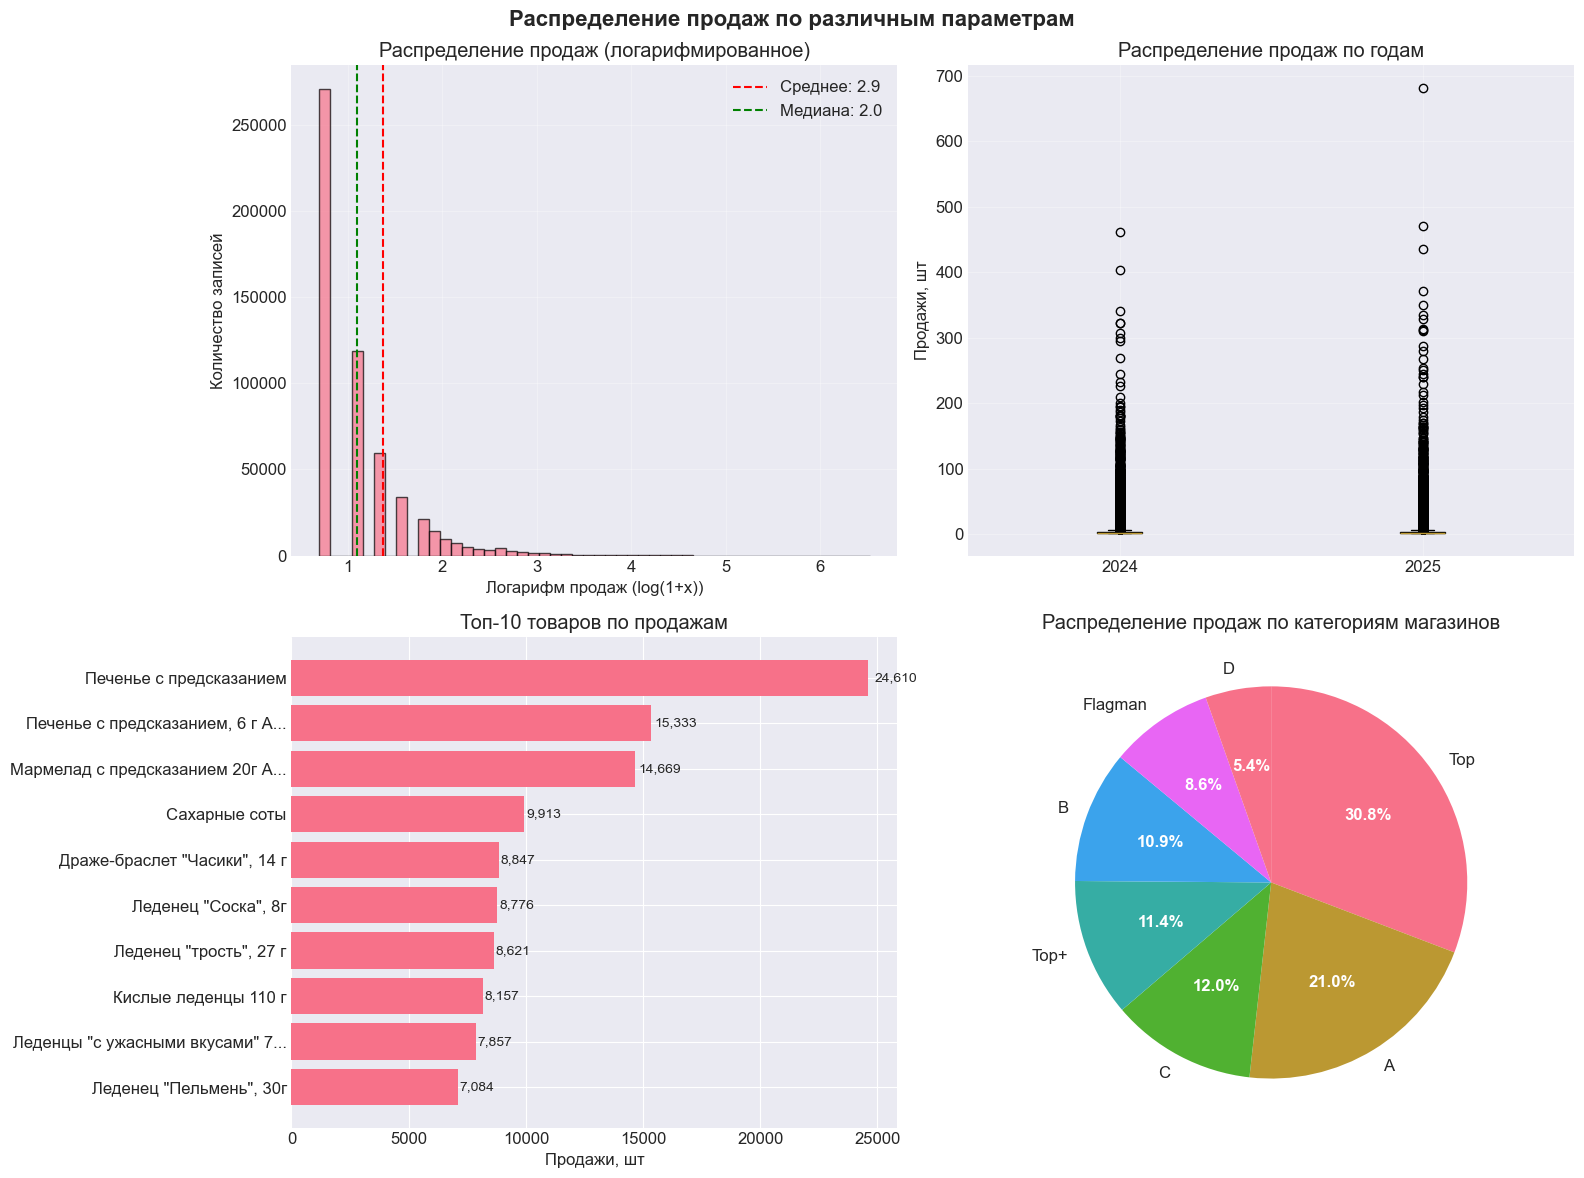

In [94]:
# Визуализация 1: распределение продаж
print("\n1. Визуализация 1: распределение продаж")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Распределение продаж по различным параметрам', fontsize=16, fontweight='bold')
# 1.1 Распределение продаж (гистограмма)
ax1 = axes[0, 0]
sales_values = df_with_sales['Продажи, шт']
log_sales = np.log1p(sales_values) 
ax1.hist(log_sales, bins=50, edgecolor='black', alpha=0.7)
ax1.set_xlabel('Логарифм продаж (log(1+x))')
ax1.set_ylabel('Количество записей')
ax1.set_title('Распределение продаж (логарифмированное)')
ax1.grid(True, alpha=0.3)
# Статистика
mean_sales = sales_values.mean()
median_sales = sales_values.median()
ax1.axvline(x=np.log1p(mean_sales), color='red', linestyle='--', label=f'Среднее: {mean_sales:.1f}')
ax1.axvline(x=np.log1p(median_sales), color='green', linestyle='--', label=f'Медиана: {median_sales:.1f}')
ax1.legend()
# 1.2 Распределение по годам (боксплот)
ax2 = axes[0, 1]
yearly_sales = [df_with_sales[df_with_sales['Год'] == year]['Продажи, шт'] for year in [2024, 2025]]
box = ax2.boxplot(yearly_sales, labels=['2024', '2025'], patch_artist=True)
colors = ['lightblue', 'lightgreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
ax2.set_ylabel('Продажи, шт')
ax2.set_title('Распределение продаж по годам')
ax2.grid(True, alpha=0.3)
# 1.3 Top-10 товаров по продажам (столбчатая диаграмма)
ax3 = axes[1, 0]
top_10_products = product_sales.head(10).copy()
top_10_products['Короткое_название'] = top_10_products['Наименование товара'].apply(
    lambda x: x[:30] + '...' if len(x) > 30 else x
)
bars = ax3.barh(range(len(top_10_products)), top_10_products['Продажи, шт'])
ax3.set_yticks(range(len(top_10_products)))
ax3.set_yticklabels(top_10_products['Короткое_название'])
ax3.set_xlabel('Продажи, шт')
ax3.set_title('Топ-10 товаров по продажам')
ax3.invert_yaxis()  # Самый продаваемый товар сверху
# Добавление значений на столбцы
for bar, value in zip(bars, top_10_products['Продажи, шт']):
    ax3.text(value + value*0.01, bar.get_y() + bar.get_height()/2, 
             f'{value:,.0f}', va='center', fontsize=10)
# 1.4 Распределение по категориям магазинов
ax4 = axes[1, 1]
category_sales = df_with_sales.groupby('Категория магазина')['Продажи, шт'].sum().sort_values(ascending=False)
# Круговая диаграмма
wedges, texts, autotexts = ax4.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%',
                                   startangle=90, counterclock=False)
ax4.set_title('Распределение продаж по категориям магазинов')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
plt.tight_layout()
plt.savefig('visualizations/1_raspredelenie_prodazh.png', dpi=300, bbox_inches='tight')
plt.show()


2. Визуализация 2: анализ OOS (дефицит)


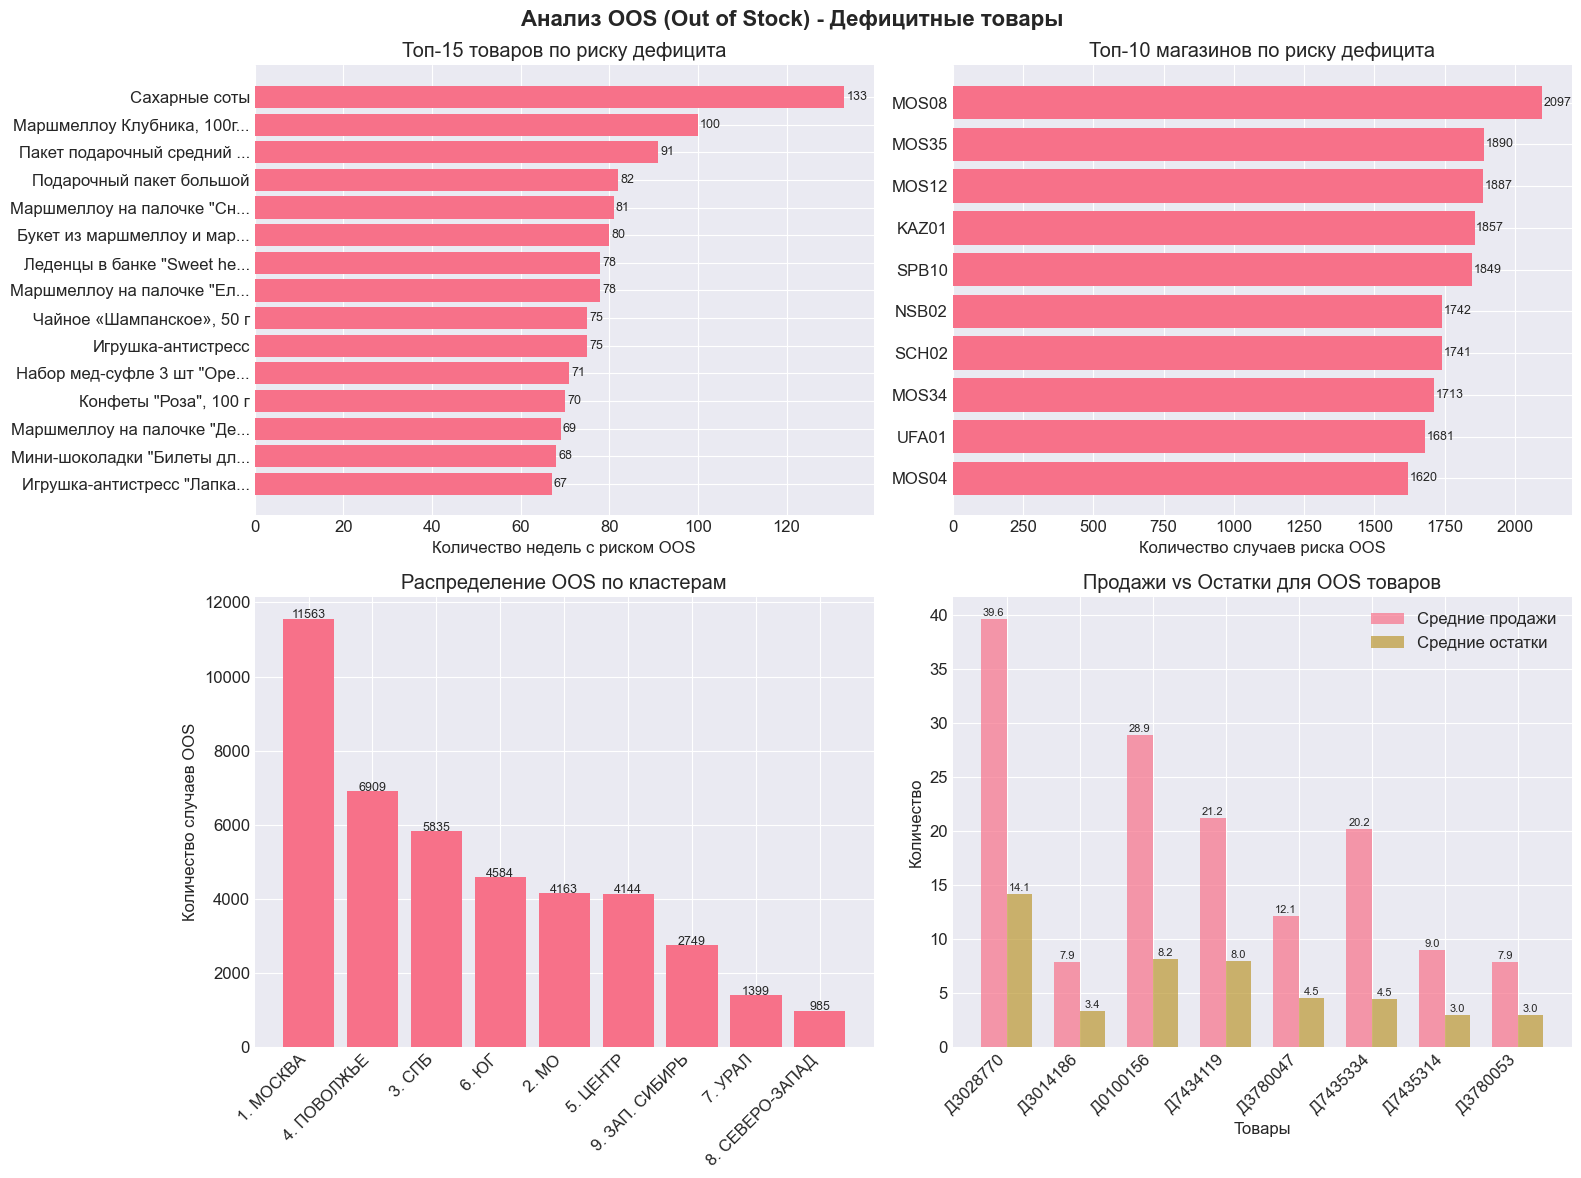

In [95]:
# Визуализация 2: анализ OOS (дефицит)
print("\n2. Визуализация 2: анализ OOS (дефицит)")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Анализ OOS (Out of Stock) - Дефицитные товары', fontsize=16, fontweight='bold')
# 2.1 Топ-15 товаров по неделям с риском OOS
ax1 = axes[0, 0]
top_15_oos = oos_risk_by_product.head(15).reset_index()
top_15_oos['Название'] = top_15_oos['Артикул'].apply(
    lambda x: df_with_sales[df_with_sales['Артикул'] == x]['Наименование товара'].iloc[0] 
    if x in df_with_sales['Артикул'].values else str(x)
)
top_15_oos['Короткое_название'] = top_15_oos['Название'].apply(
    lambda x: x[:25] + '...' if len(x) > 25 else x
)
bars = ax1.barh(range(len(top_15_oos)), top_15_oos['Уникальный_ключ'])
ax1.set_yticks(range(len(top_15_oos)))
ax1.set_yticklabels(top_15_oos['Короткое_название'])
ax1.set_xlabel('Количество недель с риском OOS')
ax1.set_title('Топ-15 товаров по риску дефицита')
ax1.invert_yaxis()
for bar, value in zip(bars, top_15_oos['Уникальный_ключ']):
    ax1.text(value + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{value:.0f}', va='center', fontsize=9)
# 2.2 Топ-10 магазинов по OOS риску
ax2 = axes[0, 1]
top_10_stores_oos = oos_risk_by_store.head(10).reset_index()
bars = ax2.barh(range(len(top_10_stores_oos)), top_10_stores_oos['Уникальный_ключ'])
ax2.set_yticks(range(len(top_10_stores_oos)))
ax2.set_yticklabels(top_10_stores_oos['Код магазина'])
ax2.set_xlabel('Количество случаев риска OOS')
ax2.set_title('Топ-10 магазинов по риску дефицита')
ax2.invert_yaxis()
for bar, value in zip(bars, top_10_stores_oos['Уникальный_ключ']):
    ax2.text(value + 5, bar.get_y() + bar.get_height()/2, 
             f'{value:.0f}', va='center', fontsize=9)
# 2.3 Распределение OOS по кластерам
ax3 = axes[1, 0]
oos_with_clusters = df_active[df_active['Остатки_малы']].groupby('Кластер').size().sort_values(ascending=False)
bars = ax3.bar(range(len(oos_with_clusters)), oos_with_clusters.values)
ax3.set_xticks(range(len(oos_with_clusters)))
ax3.set_xticklabels(oos_with_clusters.index, rotation=45, ha='right')
ax3.set_ylabel('Количество случаев OOS')
ax3.set_title('Распределение OOS по кластерам')
for bar, value in zip(bars, oos_with_clusters.values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             f'{value:.0f}', ha='center', fontsize=9)
# 2.4 Соотношение продаж и остатков для OOS товаров
ax4 = axes[1, 1]
if len(top_oos_products) > 0:
    sample_oos = top_oos_products.head(8)    
    x = np.arange(len(sample_oos))
    width = 0.35    
    bars1 = ax4.bar(x - width/2, sample_oos['Продажи, шт']/sample_oos['Уникальный_ключ'], 
                    width, label='Средние продажи', alpha=0.7)
    bars2 = ax4.bar(x + width/2, sample_oos['Остатки магазина на конец недели'], 
                    width, label='Средние остатки', alpha=0.7)    
    ax4.set_xlabel('Товары')
    ax4.set_ylabel('Количество')
    ax4.set_title('Продажи vs Остатки для OOS товаров')
    ax4.set_xticks(x)
    ax4.set_xticklabels(sample_oos['Артикул'], rotation=45, ha='right')
    ax4.legend()    
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.savefig('visualizations/2_analiz_oos.png', dpi=300, bbox_inches='tight')
plt.show()


3. Визуализация 3: анализ overstock


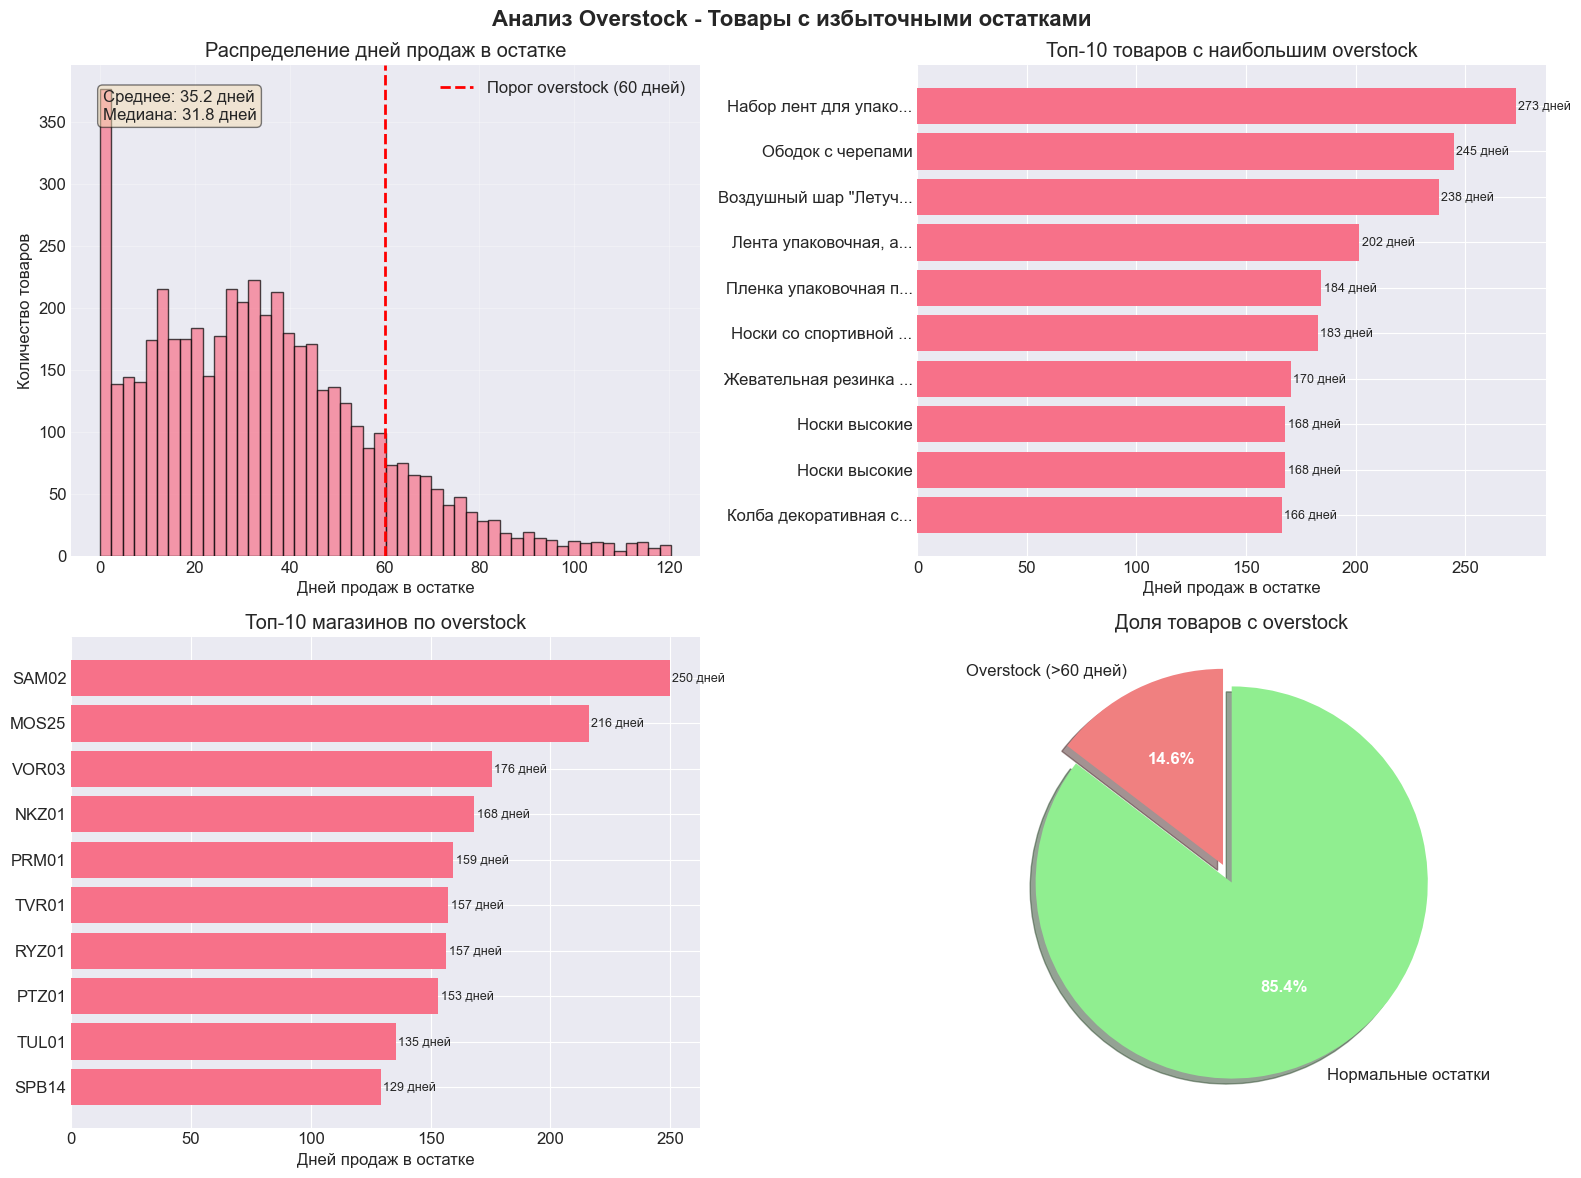

In [96]:
# Визуализация 3: анализ overstock
print("\n3. Визуализация 3: анализ overstock")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Анализ Overstock - Товары с избыточными остатками', fontsize=16, fontweight='bold')
# 3.1 Распределение дней продаж в остатке
ax1 = axes[0, 0]
days_data = product_stats_corrected['Дней_продаж_в_остатке']
q99 = days_data.quantile(0.99)
filtered_days = days_data[days_data <= q99]
ax1.hist(filtered_days, bins=50, edgecolor='black', alpha=0.7)
ax1.axvline(x=60, color='red', linestyle='--', linewidth=2, label='Порог overstock (60 дней)')
ax1.set_xlabel('Дней продаж в остатке')
ax1.set_ylabel('Количество товаров')
ax1.set_title('Распределение дней продаж в остатке')
ax1.legend()
ax1.grid(True, alpha=0.3)
mean_days = days_data.mean()
median_days = days_data.median()
ax1.text(0.05, 0.95, f'Среднее: {mean_days:.1f} дней\nМедиана: {median_days:.1f} дней',
         transform=ax1.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
# 3.2 Топ-10 товаров с наибольшим overstock
ax2 = axes[0, 1]
if len(overstock_corrected) > 0:
    top_10_overstock = overstock_corrected.head(10).copy()
    top_10_overstock['Короткое_название'] = top_10_overstock['Наименование товара'].apply(
        lambda x: x[:20] + '...' if len(x) > 20 else x
    )    
    bars = ax2.barh(range(len(top_10_overstock)), top_10_overstock['Дней_продаж_в_остатке'])
    ax2.set_yticks(range(len(top_10_overstock)))
    ax2.set_yticklabels(top_10_overstock['Короткое_название'])
    ax2.set_xlabel('Дней продаж в остатке')
    ax2.set_title('Топ-10 товаров с наибольшим overstock')
    ax2.invert_yaxis()
    for bar, value in zip(bars, top_10_overstock['Дней_продаж_в_остатке']):
        ax2.text(value + 1, bar.get_y() + bar.get_height()/2, 
                 f'{value:.0f} дней', va='center', fontsize=9)
# 3.3 Соотношение overstock по магазинам
ax3 = axes[1, 0]
if 'store_overstock' in locals() and len(store_overstock) > 0:
    top_stores_overstock = store_overstock.head(10)    
    bars = ax3.barh(range(len(top_stores_overstock)), top_stores_overstock['Дней_продаж_в_остатке'])
    ax3.set_yticks(range(len(top_stores_overstock)))
    ax3.set_yticklabels(top_stores_overstock['Код магазина'])
    ax3.set_xlabel('Дней продаж в остатке')
    ax3.set_title('Топ-10 магазинов по overstock')
    ax3.invert_yaxis()    
    for bar, value in zip(bars, top_stores_overstock['Дней_продаж_в_остатке']):
        ax3.text(value + 1, bar.get_y() + bar.get_height()/2, 
                 f'{value:.0f} дней', va='center', fontsize=9)
# 3.4 Круговая диаграмма: Доля товаров с overstock
ax4 = axes[1, 1]
overstock_count = len(overstock_corrected)
normal_count = len(product_stats_corrected) - overstock_count
labels = ['Overstock (>60 дней)', 'Нормальные остатки']
sizes = [overstock_count, normal_count]
colors = ['lightcoral', 'lightgreen']
explode = (0.1, 0)
wedges, texts, autotexts = ax4.pie(sizes, explode=explode, labels=labels, colors=colors,
                                   autopct='%1.1f%%', startangle=90, shadow=True)
ax4.set_title('Доля товаров с overstock')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
plt.tight_layout()
plt.savefig('visualizations/3_analiz_overstock.png', dpi=300, bbox_inches='tight')
plt.show()


4. Визуализация 4: анализ сезонности


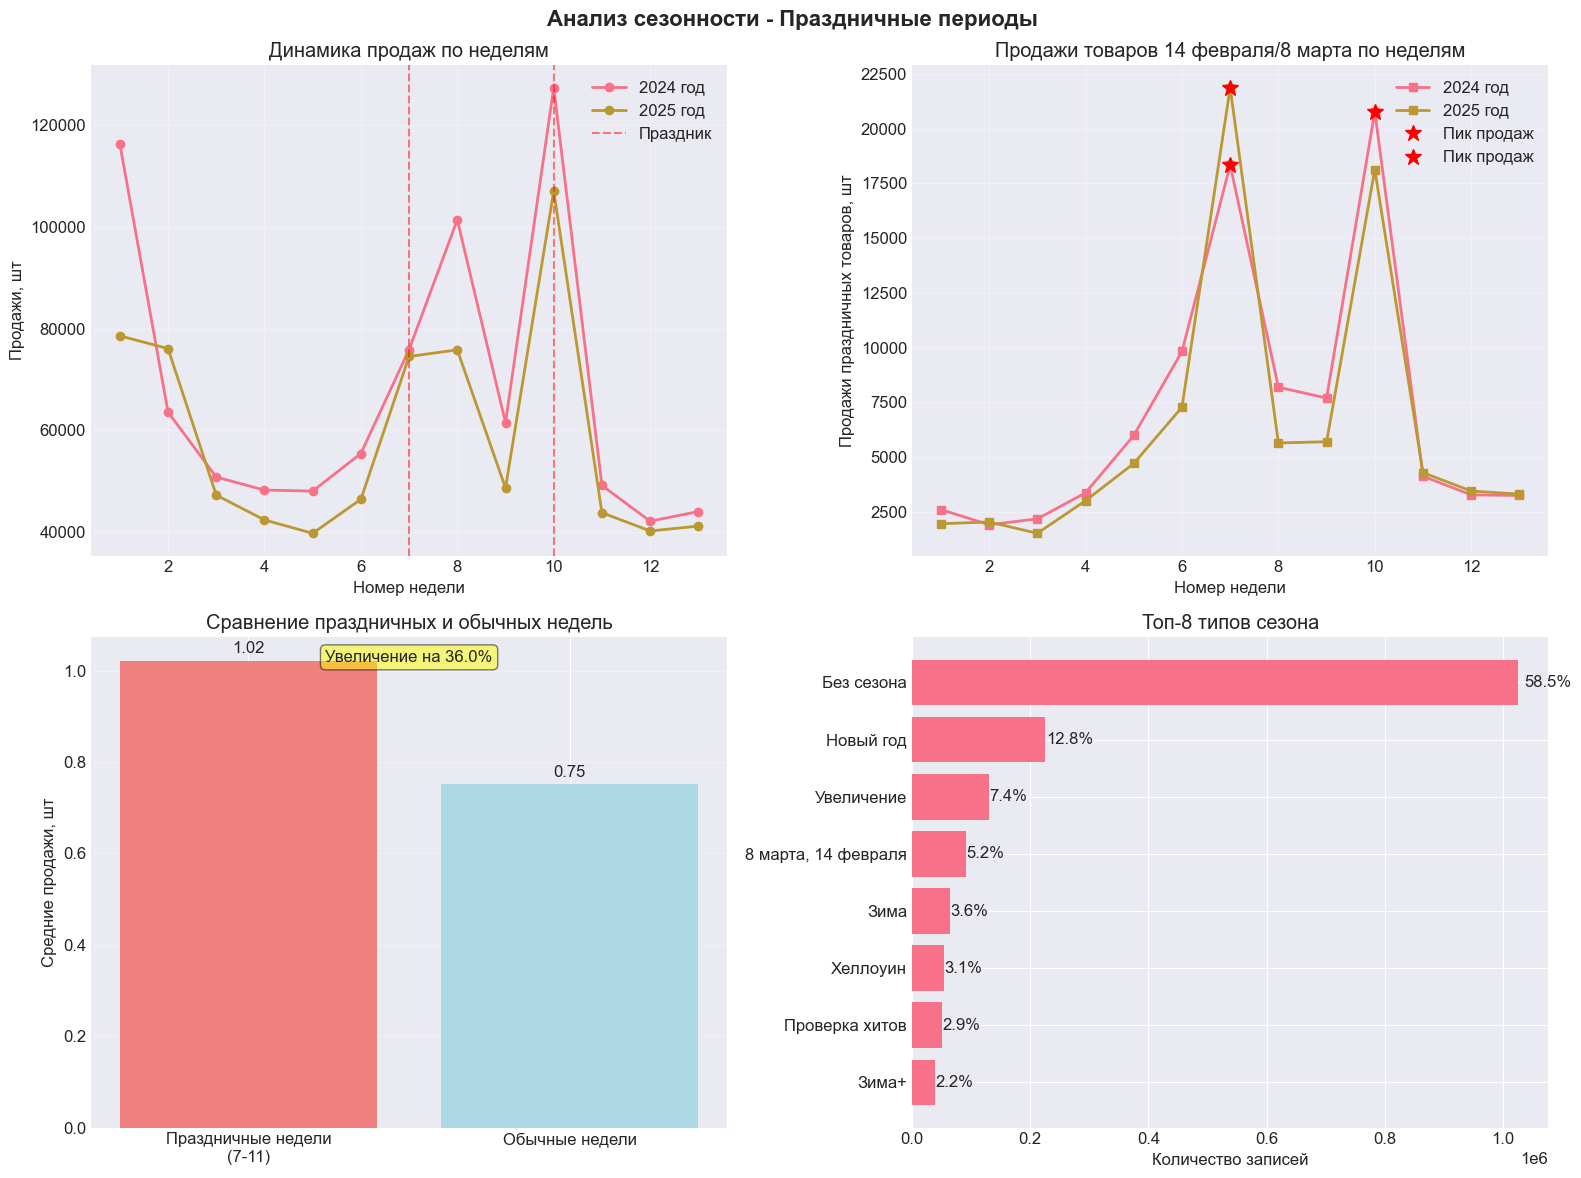

In [97]:
# Визуализация 4: анализ сезонности
print("\n4. Визуализация 4: анализ сезонности")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Анализ сезонности - Праздничные периоды', fontsize=16, fontweight='bold')
# 4.1 Динамика продаж по неделям
ax1 = axes[0, 0]
weekly_sales = df_with_sales.groupby(['Год', 'Номер недели'])['Продажи, шт'].sum().reset_index()
for year in [2024, 2025]:
    year_data = weekly_sales[weekly_sales['Год'] == year]
    ax1.plot(year_data['Номер недели'], year_data['Продажи, шт'], 
             marker='o', linewidth=2, label=f'{year} год')
holiday_weeks = [7, 10]  # 14 февраля и 8 марта
for week in holiday_weeks:
    ax1.axvline(x=week, color='red', linestyle='--', alpha=0.5, label='Праздник' if week == 7 else "")
ax1.set_xlabel('Номер недели')
ax1.set_ylabel('Продажи, шт')
ax1.set_title('Динамика продаж по неделям')
ax1.legend()
ax1.grid(True, alpha=0.3)
# 4.2 Продажи праздничных товаров по неделям
ax2 = axes[0, 1]
if 'holiday_sales_by_week' in locals() and len(holiday_sales_by_week) > 0:
    holiday_sales_sorted = holiday_sales_by_week.sort_values(['Год', 'Номер недели'])    
    for year in holiday_sales_sorted['Год'].unique():
        year_data = holiday_sales_sorted[holiday_sales_sorted['Год'] == year]
        ax2.plot(year_data['Номер недели'], year_data['Продажи, шт'], 
                 marker='s', linewidth=2, label=f'{year} год')
    peak_weeks_data = holiday_sales_by_week.nlargest(3, 'Продажи, шт')
    for _, row in peak_weeks_data.iterrows():
        ax2.plot(row['Номер недели'], row['Продажи, шт'], 'r*', markersize=12, 
                 label='Пик продаж' if row['Номер недели'] == peak_weeks_data.iloc[0]['Номер недели'] else "")    
    ax2.set_xlabel('Номер недели')
    ax2.set_ylabel('Продажи праздничных товаров, шт')
    ax2.set_title('Продажи товаров 14 февраля/8 марта по неделям')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
# 4.3 Сравнение праздничных и обычных недель
ax3 = axes[1, 0]
categories = ['Праздничные недели\n(7-11)', 'Обычные недели']
values = [holiday_vs_normal.loc[True, 'Продажи, шт'], 
          holiday_vs_normal.loc[False, 'Продажи, шт']]
bars = ax3.bar(categories, values, color=['lightcoral', 'lightblue'])
ax3.set_ylabel('Средние продажи, шт')
ax3.set_title('Сравнение праздничных и обычных недель')
ax3.grid(True, alpha=0.3, axis='y')
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.2f}', ha='center', va='bottom', fontsize=12)
increase_pct = (values[0] / values[1] - 1) * 100
ax3.text(0.5, 0.95, f'Увеличение на {increase_pct:.1f}%',
         transform=ax3.transAxes, ha='center', fontsize=12,
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
# 4.4 Распределение по типам сезона
ax4 = axes[1, 1]
if 'season_stats' in locals() and len(season_stats) > 0:
    top_seasons = season_stats.head(8)    
    bars = ax4.barh(range(len(top_seasons)), top_seasons.values)
    ax4.set_yticks(range(len(top_seasons)))
    ax4.set_yticklabels(top_seasons.index)
    ax4.set_xlabel('Количество записей')
    ax4.set_title('Топ-8 типов сезона')
    ax4.invert_yaxis()    
    total = season_stats.sum()
    for i, (season, count) in enumerate(top_seasons.items()):
        percentage = (count / total) * 100
        ax4.text(count + count*0.01, i, f'{percentage:.1f}%', va='center')
plt.tight_layout()
plt.savefig('visualizations/4_analiz_sezonnosti.png', dpi=300, bbox_inches='tight')
plt.show()


5. Визуализация 5: ABC-XYZ анализ


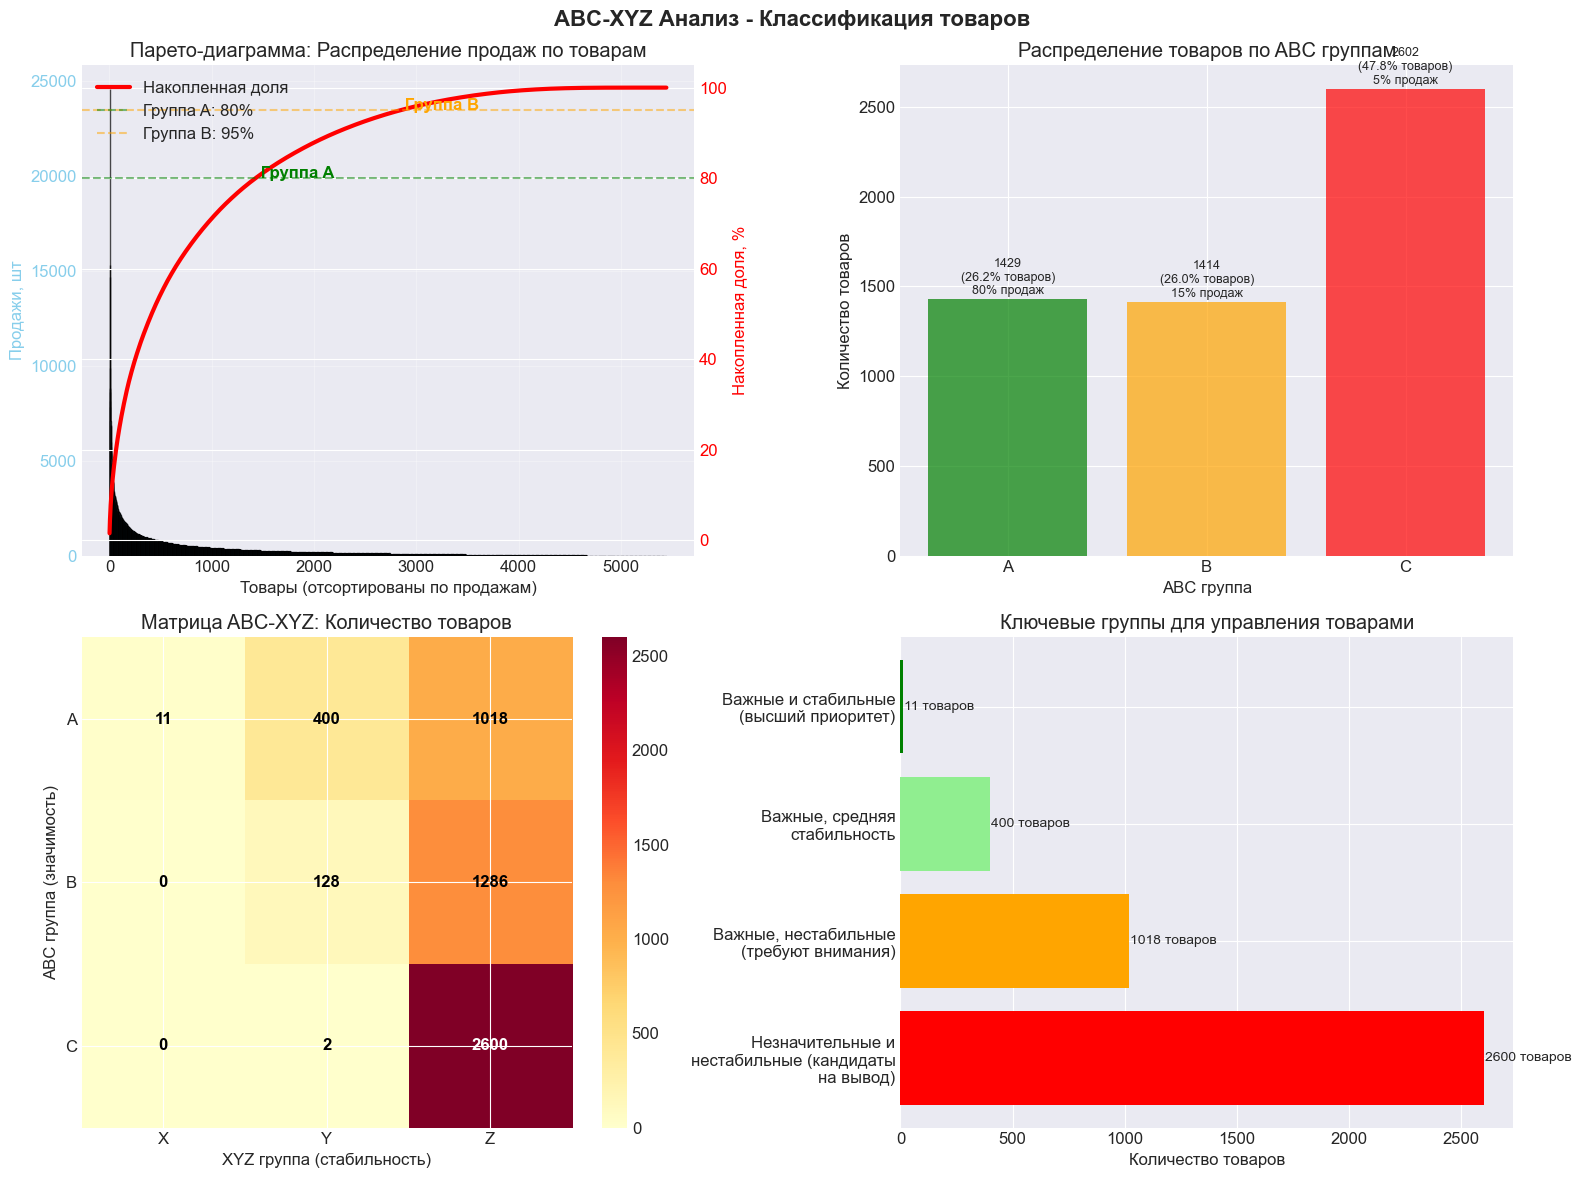

In [98]:
# Визуализация 5: ABC-XYZ анализ
print("\n5. Визуализация 5: ABC-XYZ анализ")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ABC-XYZ Анализ - Классификация товаров', fontsize=16, fontweight='bold')
# 5.1 ABC анализ: Парето-диаграмма
ax1 = axes[0, 0]
abc_sorted = product_sales.sort_values('Продажи, шт', ascending=False).copy()
abc_sorted['Накопленная_доля'] = abc_sorted['Продажи, шт'].cumsum() / abc_sorted['Продажи, шт'].sum() * 100
abc_sorted['Номер_товара'] = range(1, len(abc_sorted) + 1)
bars = ax1.bar(abc_sorted['Номер_товара'], abc_sorted['Продажи, шт'], 
               color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Товары (отсортированы по продажам)')
ax1.set_ylabel('Продажи, шт', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Парето-диаграмма: Распределение продаж по товарам')
ax2 = ax1.twinx()
ax2.plot(abc_sorted['Номер_товара'], abc_sorted['Накопленная_доля'], 
         color='red', linewidth=3, label='Накопленная доля')
ax2.set_ylabel('Накопленная доля, %', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# точки 80% и 95%
for threshold, label, color in [(80, 'Группа A', 'green'), (95, 'Группа B', 'orange')]:
    idx = (abc_sorted['Накопленная_доля'] >= threshold).idxmax()
    if not pd.isna(idx):
        x_val = abc_sorted.loc[idx, 'Номер_товара']
        ax2.axhline(y=threshold, color=color, linestyle='--', alpha=0.5, label=f'{label}: {threshold}%')
        ax2.text(x_val, threshold, f' {label}', color=color, fontweight='bold')
ax2.legend(loc='upper left')
ax1.grid(True, alpha=0.3)
# 5.2 Распределение по ABC группам
ax3 = axes[0, 1]
abc_counts = product_sales['ABC_группа'].value_counts().sort_index()
bars = ax3.bar(abc_counts.index, abc_counts.values, 
               color=['green', 'orange', 'red'], alpha=0.7)
ax3.set_xlabel('ABC группа')
ax3.set_ylabel('Количество товаров')
ax3.set_title('Распределение товаров по ABC группам')
total_abc = abc_counts.sum()
for bar, group in zip(bars, abc_counts.index):
    height = bar.get_height()
    count = abc_counts[group]
    percentage = (count / total_abc) * 100    
    if group == 'A':
        sales_pct = 80
    elif group == 'B':
        sales_pct = 15
    else:
        sales_pct = 5    
    ax3.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{count}\n({percentage:.1f}% товаров)\n{sales_pct}% продаж',
             ha='center', va='bottom', fontsize=9)
# 5.3 Матрица ABC-XYZ (тепловая карта)
ax4 = axes[1, 0]
abc_xyz_matrix = product_analysis_corrected.groupby(['ABC_группа', 'XYZ_группа']).size().unstack(fill_value=0)
abc_order = ['A', 'B', 'C']
xyz_order = ['X', 'Y', 'Z']
abc_xyz_matrix = abc_xyz_matrix.reindex(index=abc_order, columns=xyz_order)
im = ax4.imshow(abc_xyz_matrix.values, cmap='YlOrRd', aspect='auto')
for i in range(len(abc_order)):
    for j in range(len(xyz_order)):
        value = abc_xyz_matrix.iloc[i, j]
        color = 'white' if value > abc_xyz_matrix.values.max()/2 else 'black'
        ax4.text(j, i, str(value), ha='center', va='center', color=color, fontweight='bold')
ax4.set_xticks(range(len(xyz_order)))
ax4.set_xticklabels(xyz_order)
ax4.set_yticks(range(len(abc_order)))
ax4.set_yticklabels(abc_order)
ax4.set_xlabel('XYZ группа (стабильность)')
ax4.set_ylabel('ABC группа (значимость)')
ax4.set_title('Матрица ABC-XYZ: Количество товаров')
plt.colorbar(im, ax=ax4)
# 5.4 Ключевые группы для управления
ax5 = axes[1, 1]
key_groups = {
    'AX': 'Важные и стабильные\n(высший приоритет)',
    'AY': 'Важные, средняя\nстабильность',
    'AZ': 'Важные, нестабильные\n(требуют внимания)',
    'CZ': 'Незначительные и\nнестабильные (кандидаты\nна вывод)'
}
key_counts = {group: abc_xyz_corrected_stats.get(group, 0) for group in key_groups.keys()}
groups = list(key_groups.values())
counts = list(key_counts.values())
colors = ['green', 'lightgreen', 'orange', 'red']
bars = ax5.barh(range(len(groups)), counts, color=colors)
ax5.set_yticks(range(len(groups)))
ax5.set_yticklabels(groups)
ax5.set_xlabel('Количество товаров')
ax5.set_title('Ключевые группы для управления товарами')
ax5.invert_yaxis()
for bar, count in zip(bars, counts):
    ax5.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
             f'{count} товаров', va='center', fontsize=10)
plt.tight_layout()
plt.savefig('visualizations/5_abc_xyz_analiz.png', dpi=300, bbox_inches='tight')
plt.show()


6. Визуализация 6: корреляция и взаимосвязи


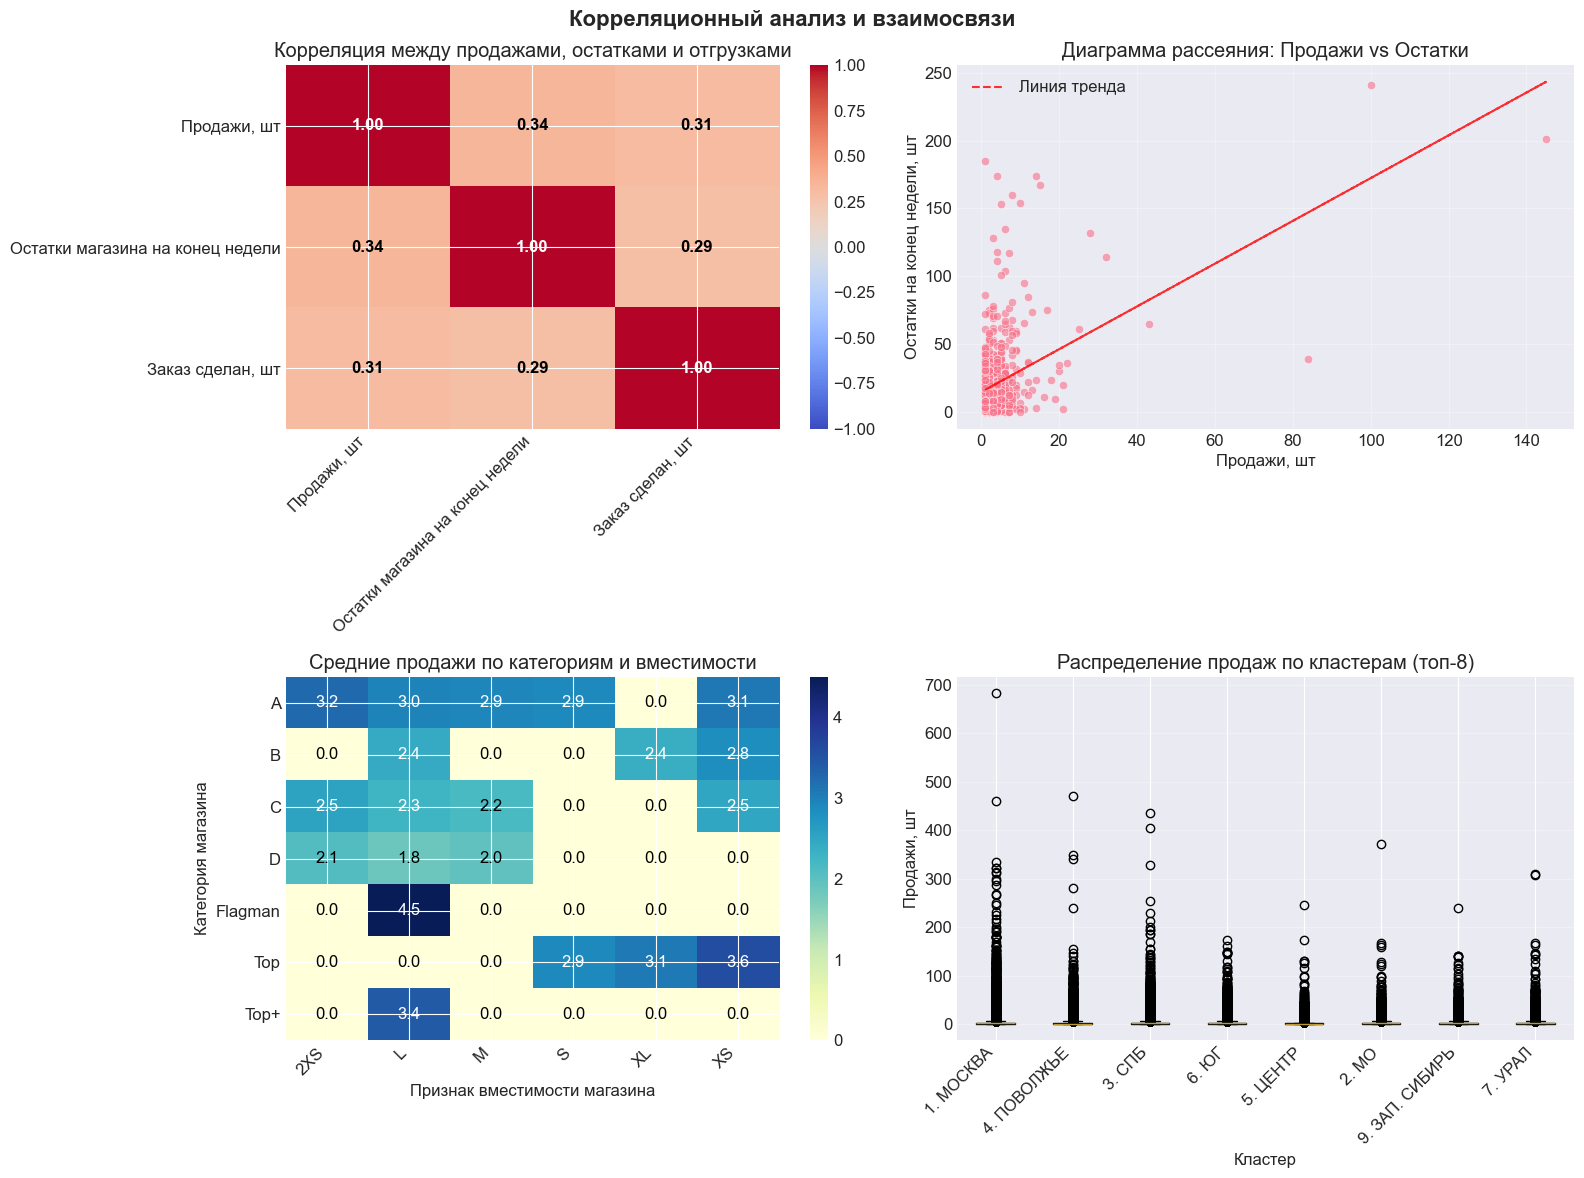

In [99]:
# Визуализация 6: корреляция и взаимосвязи
print("\n6. Визуализация 6: корреляция и взаимосвязи")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Корреляционный анализ и взаимосвязи', fontsize=16, fontweight='bold')
# 6.1 Корреляция между ключевыми числовыми показателями
ax1 = axes[0, 0]
corr_data = df_with_sales[['Продажи, шт', 'Остатки магазина на конец недели', 'Заказ сделан, шт']].copy()
corr_matrix = corr_data.corr()
im = ax1.imshow(corr_matrix.values, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        ax1.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black',
                fontweight='bold')
ax1.set_xticks(range(corr_matrix.shape[1]))
ax1.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax1.set_yticks(range(corr_matrix.shape[0]))
ax1.set_yticklabels(corr_matrix.columns)
ax1.set_title('Корреляция между продажами, остатками и отгрузками')
plt.colorbar(im, ax=ax1)
# 6.2 Диаграмма рассеяния: Продажи vs Остатки
ax2 = axes[0, 1]
sample_data = df_with_sales.sample(n=1000, random_state=42)  # выборка
scatter = ax2.scatter(sample_data['Продажи, шт'], sample_data['Остатки магазина на конец недели'],
                     alpha=0.6, edgecolors='w', linewidth=0.5)
ax2.set_xlabel('Продажи, шт')
ax2.set_ylabel('Остатки на конец недели, шт')
ax2.set_title('Диаграмма рассеяния: Продажи vs Остатки')
ax2.grid(True, alpha=0.3)
try:
    z = np.polyfit(sample_data['Продажи, шт'], sample_data['Остатки магазина на конец недели'], 1)
    p = np.poly1d(z)
    ax2.plot(sample_data['Продажи, шт'], p(sample_data['Продажи, шт']), 
             "r--", alpha=0.8, label='Линия тренда')
    ax2.legend()
except:
    pass
# 6.3 Распределение по категориям магазинов и вместимости
ax3 = axes[1, 0]
pivot_data = df_with_sales.pivot_table(
    values='Продажи, шт',
    index='Категория магазина',
    columns='Признак вместимости магазина',
    aggfunc='mean',
    fill_value=0
)
im = ax3.imshow(pivot_data.values, cmap='YlGnBu', aspect='auto')
for i in range(pivot_data.shape[0]):
    for j in range(pivot_data.shape[1]):
        ax3.text(j, i, f'{pivot_data.iloc[i, j]:.1f}', 
                ha='center', va='center', color='white' if pivot_data.iloc[i, j] > pivot_data.values.max()/2 else 'black')
ax3.set_xticks(range(pivot_data.shape[1]))
ax3.set_xticklabels(pivot_data.columns, rotation=45, ha='right')
ax3.set_yticks(range(pivot_data.shape[0]))
ax3.set_yticklabels(pivot_data.index)
ax3.set_xlabel('Признак вместимости магазина')
ax3.set_ylabel('Категория магазина')
ax3.set_title('Средние продажи по категориям и вместимости')
plt.colorbar(im, ax=ax3)
# 6.4 Boxplot продаж по кластерам
ax4 = axes[1, 1]
cluster_sales_data = []
cluster_labels = []
for cluster in df_with_sales['Кластер'].value_counts().head(8).index:
    cluster_data = df_with_sales[df_with_sales['Кластер'] == cluster]['Продажи, шт']
    if len(cluster_data) > 0:
        cluster_sales_data.append(cluster_data)
        short_label = cluster[:20] + '...' if len(cluster) > 20 else cluster
        cluster_labels.append(short_label)
box = ax4.boxplot(cluster_sales_data, labels=cluster_labels, patch_artist=True)
colors = plt.cm.Set3(np.linspace(0, 1, len(cluster_sales_data)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
ax4.set_xlabel('Кластер')
ax4.set_ylabel('Продажи, шт')
ax4.set_title('Распределение продаж по кластерам (топ-8)')
ax4.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('visualizations/6_korrelyacii_vzaimosvyazi.png', dpi=300, bbox_inches='tight')
plt.show()

In [100]:
# 22. Создание таблицы норм отгрузки на 2026 год
# 22.1. Подготовка данных для расчета норм
df_sales_2024 = df_with_sales[df_with_sales['Год'] == 2024].copy()
df_sales_2025 = df_with_sales[df_with_sales['Год'] == 2025].copy()
print(f"   • Данные 2024: {len(df_sales_2024):,} записей с продажами")
print(f"   • Данные 2025: {len(df_sales_2025):,} записей с продажами")

   • Данные 2024: 288,323 записей с продажами
   • Данные 2025: 275,417 записей с продажами


In [101]:
# 22.2. Расчет базовых норм по товарам и магазинам
# Группировка по товару и магазину
norms_data = df_with_sales.groupby(['Артикул', 'Код магазина']).agg({
    'Продажи, шт': ['sum', 'mean', 'std'],
    'Магазин': 'first',
    'Наименование товара': 'first',
    'Категория магазина': 'first',
    'Признак вместимости магазина': 'first',
    'Кластер': 'first'
}).reset_index()
# Упрощение названия колонок
norms_data.columns = ['Артикул', 'Код магазина', 'Сумма_продаж', 
                      'Средние_продажи', 'Стд_продаж', 'Магазин', 
                      'Наименование_товара', 'Категория_магазина',
                      'Вместимость_магазина', 'Кластер']
print(f"Рассчитано норм: {len(norms_data):,} (товар × магазин)")

Рассчитано норм: 163,350 (товар × магазин)


In [102]:
# 22.3. Расчет коэффициентов для 2026 года
# 22.3.1 Коэффициент роста (сравнение 2025 vs 2024)
sales_2024_total = df_sales_2024['Продажи, шт'].sum()
sales_2025_total = df_sales_2025['Продажи, шт'].sum()
growth_coefficient = sales_2025_total / sales_2024_total if sales_2024_total > 0 else 1.0
print(f"Общие продажи 2024: {sales_2024_total:,}")
print(f"Общие продажи 2025: {sales_2025_total:,}")
print(f"Коэффициент роста: {growth_coefficient:.2f}")
# 22.3.2. Коэффициент сезонности (праздники)
holiday_coefficient = 1.4  # Из анализа
print(f"Коэффициент сезонности (праздники): {holiday_coefficient}")
# 22.3.3. Коэффициент для OOS-товаров
oos_coefficient = 1.2  # +20% страховой запас
print(f"Коэффициент OOS (страховой запас): {oos_coefficient}")

Общие продажи 2024: 883,878
Общие продажи 2025: 761,572
Коэффициент роста: 0.86
Коэффициент сезонности (праздники): 1.4
Коэффициент OOS (страховой запас): 1.2


In [103]:
# 22.4. Расчет финальных норм
# Базовая недельная норма = Средние продажи × Коэффициент роста
norms_data['Базовая_норма_неделя'] = norms_data['Средние_продажи'] * growth_coefficient
norms_data['Базовая_норма_неделя'] = norms_data['Базовая_норма_неделя'].fillna(0)
norms_data['Базовая_норма_неделя'] = norms_data['Базовая_норма_неделя'].round().astype(int)
norms_data['Базовая_норма_неделя'] = norms_data['Базовая_норма_неделя'].clip(lower=1)
norms_data['Норма_праздник_неделя'] = (norms_data['Базовая_норма_неделя'] * holiday_coefficient).round().astype(int)
print(f"Рассчитаны базовые нормы: {len(norms_data):,}")
print(f"Средняя базовая норма: {norms_data['Базовая_норма_неделя'].mean():.1f} шт/неделю")
print(f"Средняя праздничная норма: {norms_data['Норма_праздник_неделя'].mean():.1f} шт/неделю")

Рассчитаны базовые нормы: 163,350
Средняя базовая норма: 1.6 шт/неделю
Средняя праздничная норма: 2.0 шт/неделю


In [104]:
# 22.5. Интеграция с ABC-XYZ анализом
norms_data = pd.merge(
    norms_data,
    product_analysis_corrected[['Артикул', 'ABC_группа', 'XYZ_группа', 'ABC_XYZ']],
    on='Артикул',
    how='left'
)
norms_data['ABC_группа'] = norms_data['ABC_группа'].fillna('C')
norms_data['XYZ_группа'] = norms_data['XYZ_группа'].fillna('Z')
norms_data['ABC_XYZ'] = norms_data['ABC_XYZ'].fillna('CZ')
print(f"Добавлена ABC-XYZ классификация")

Добавлена ABC-XYZ классификация


In [105]:
# 22.6. Добавление информации OOS и Overstock
# Добавляем флаги OOS риска (топ-50 товаров по риску OOS)
if 'oos_risk_by_product' in locals() and len(oos_risk_by_product) > 0:
    top_oos_products_list = oos_risk_by_product.head(50).index.tolist()
    norms_data['OOS_риск'] = norms_data['Артикул'].isin(top_oos_products_list)
    print(f"Товаров с OOS риском отмечено: {norms_data['OOS_риск'].sum():,}")
else:
    norms_data['OOS_риск'] = False
    print("Данные OOS не найдены")
# Добавляем флаги Overstock
if 'overstock_corrected' in locals() and len(overstock_corrected) > 0:
    overstock_products_list = overstock_corrected['Артикул'].head(100).tolist()
    norms_data['Overstock_риск'] = norms_data['Артикул'].isin(overstock_products_list)
    print(f"Товаров с Overstock риском отмечено: {norms_data['Overstock_риск'].sum():,}")
    print(f"Всего товаров с overstock в анализе: {len(overstock_corrected):,}")
else:
    norms_data['Overstock_риск'] = False
    print("Данные Overstock не найдены")

Товаров с OOS риском отмечено: 1,500
Товаров с Overstock риском отмечено: 3,000
Всего товаров с overstock в анализе: 735


In [106]:
# 22.7. Добавление сезонных меток
if 'valentine_march_products' in locals():
    seasonal_products = valentine_march_products['Артикул'].unique().tolist()
    norms_data['Сезонный_товар'] = norms_data['Артикул'].isin(seasonal_products)
    print(f"Сезонных товаров отмечено: {norms_data['Сезонный_товар'].sum():,}")
else:
    norms_data['Сезонный_товар'] = False
    print("Данные по сезонности не найдены")

Сезонных товаров отмечено: 9,120


In [107]:
# 22.8. Создание финальной таблицы норм
final_norms_table = norms_data[[
    'Артикул', 'Наименование_товара',
    'Код магазина', 'Магазин', 'Категория_магазина', 'Вместимость_магазина', 'Кластер',
    'ABC_группа', 'XYZ_группа', 'ABC_XYZ',
    'OOS_риск', 'Overstock_риск', 'Сезонный_товар',
    'Сумма_продаж', 'Средние_продажи', 'Стд_продаж',
    'Базовая_норма_неделя', 'Норма_праздник_неделя'
]].copy()
def generate_recommendations(row):
    recommendations = []
    if row['ABC_XYZ'] in ['AX', 'AY']:
        recommendations.append('Высший приоритет')
    elif row['ABC_XYZ'] in ['AZ', 'BY']:
        recommendations.append('Средний приоритет')
    elif row['ABC_XYZ'] == 'CZ':
        recommendations.append('Кандидат на вывод')
    if row['OOS_риск']:
        recommendations.append('Требует страхового запаса (+20%)')
    if row['Overstock_риск']:
        recommendations.append('Уменьшить заказ (overstock)')
    if row['Сезонный_товар']:
        recommendations.append('Увеличить поставки в недели 7, 10')
    return '; '.join(recommendations)
final_norms_table['Рекомендации'] = final_norms_table.apply(generate_recommendations, axis=1)
final_norms_table['Праздничные_недели'] = '7, 10'  # 14 февраля и 8 марта
print(f"Создана таблица с {len(final_norms_table):,} нормами")
print(f"Уникальных товаров: {final_norms_table['Артикул'].nunique():,}")
print(f"Уникальных магазинов: {final_norms_table['Код магазина'].nunique()}")

Создана таблица с 163,350 нормами
Уникальных товаров: 5,445
Уникальных магазинов: 30


In [108]:
# 22.9. Сохранение результатов
import os
os.makedirs('results', exist_ok=True)
# 22.9.1. Сохранение полной таблицы норм
norms_path = 'results/normy_otgruzki_2026.csv'
final_norms_table.to_csv(norms_path, index=False, encoding='utf-8-sig')
print(f" Таблица норм отгрузки: {norms_path}")
print(f"     Размер: {os.path.getsize(norms_path) / 1024:.1f} КБ")
print(f"     Записей: {len(final_norms_table):,}")
# 22.9.2. Сохранение сводной таблицы по товарам
summary_by_product = final_norms_table.groupby('Артикул').agg({
    'Наименование_товара': 'first',
    'ABC_XYZ': 'first',
    'OOS_риск': 'max',
    'Overstock_риск': 'max',
    'Сезонный_товар': 'max',
    'Сумма_продаж': 'sum',
    'Базовая_норма_неделя': 'mean'
}).reset_index()
summary_by_product['Базовая_норма_неделя'] = summary_by_product['Базовая_норма_неделя'].round().astype(int)
summary_path = 'results/svodka_po_tovaram_2026.csv'
summary_by_product.to_csv(summary_path, index=False, encoding='utf-8-sig')
print(f"  Сводка по товарам: {summary_path}")
# 22.9.3. Сохранение сводной таблицы по магазинам
summary_by_store = final_norms_table.groupby('Код магазина').agg({
    'Магазин': 'first',
    'Категория_магазина': 'first',
    'Кластер': 'first',
    'Сумма_продаж': 'sum',
    'OOS_риск': 'sum',
    'Overstock_риск': 'sum',
    'Базовая_норма_неделя': 'mean'
}).reset_index()
summary_by_store['Базовая_норма_неделя'] = summary_by_store['Базовая_норма_неделя'].round().astype(int)
store_summary_path = 'results/svodka_po_magazinam_2026.csv'
summary_by_store.to_csv(store_summary_path, index=False, encoding='utf-8-sig')
print(f"  Сводка по магазинам: {store_summary_path}")
# 22.9.4. Сохранение ключевых показателей
kp_path = 'results/klyuchevye_pokazateli.txt'
with open(kp_path, 'w', encoding='utf-8') as f:
    f.write("Ключевые показатели для планирования 2026 года\n")
    f.write("=" * 60 + "\n\n")    
    f.write("1. Общая статистика:\n")
    f.write(f"   • Всего товаров: {final_norms_table['Артикул'].nunique():,}\n")
    f.write(f"   • Всего магазинов: {final_norms_table['Код магазина'].nunique()}\n")
    f.write(f"   • Всего норм отгрузки: {len(final_norms_table):,}\n\n")    
    f.write("2. ABC-XYZ классификация:\n")
    if 'abc_xyz_corrected_stats' in locals():
        f.write(f"   • Товаров AX (важные и стабильные): {abc_xyz_corrected_stats.get('AX', 0):,}\n")
        f.write(f"   • Товаров AY (важные, средние): {abc_xyz_corrected_stats.get('AY', 0):,}\n")
        f.write(f"   • Товаров CZ (кандидаты на вывод): {abc_xyz_corrected_stats.get('CZ', 0):,}\n\n")    
    f.write("3. Риски:\n")
    f.write(f"   • Товаров с OOS риском: {final_norms_table['OOS_риск'].sum():,}\n")
    f.write(f"   • Товаров с Overstock риском: {final_norms_table['Overstock_риск'].sum():,}\n")
    f.write(f"   • Сезонных товаров: {final_norms_table['Сезонный_товар'].sum():,}\n\n")    
    f.write("4. Коэффициенты для расчета:\n")
    f.write(f"   • Коэффициент роста: {growth_coefficient:.2f}\n")
    f.write(f"   • Коэффициент сезонности: {holiday_coefficient:.1f}\n")
    f.write(f"   • Коэффициент OOS: {oos_coefficient:.1f}\n\n")    
    f.write("5. Праздничные недели 2026:\n")
    f.write("   • Неделя 7: 14 февраля\n")
    f.write("   • Неделя 10: 8 марта\n")
    f.write("   • Увеличить норму в ×1.4 раза\n")    
    f.write("\n6. Ключевые выводы:\n")
    f.write(f"   • Продажи 2025 года снизились на 14% по сравнению с 2024\n")
    f.write(f"   • Товаров с overstock (>60 дней запаса): {len(overstock_corrected) if 'overstock_corrected' in locals() else 0:,}\n")
    f.write(f"   • Товаров для праздников 14 февраля/8 марта: {len(seasonal_products) if 'seasonal_products' in locals() else 0:,}\n")
    f.write(f"   • Товаров-кандидатов на вывод (CZ группа): {abc_xyz_corrected_stats.get('CZ', 0) if 'abc_xyz_corrected_stats' in locals() else 0:,}\n")
print(f" Ключевые показатели: {kp_path}")

 Таблица норм отгрузки: results/normy_otgruzki_2026.csv
     Размер: 27312.7 КБ
     Записей: 163,350
  Сводка по товарам: results/svodka_po_tovaram_2026.csv
  Сводка по магазинам: results/svodka_po_magazinam_2026.csv
 Ключевые показатели: results/klyuchevye_pokazateli.txt


In [109]:
# 22.10. Примеры норм для ключевых товаров
# Пример 1: Самый проблемный OOS товар
if 'oos_risk_by_product' in locals() and len(oos_risk_by_product) > 0:
    top_oos_product = oos_risk_by_product.index[0]
    oos_example = final_norms_table[final_norms_table['Артикул'] == top_oos_product].head(2)    
    if len(oos_example) > 0:
        print(f"\n1. Самый проблемный OOS товар ({top_oos_product}):")
        for idx, row in oos_example.iterrows():
            product_name = str(row['Наименование_товара'])  # Конвертируем в строку
            if len(product_name) > 40:
                product_name = product_name[:40] + "..."
            print(f"   • Магазин: {row['Магазин']}")
            print(f"     Товар: {product_name}")
            print(f"     Базовая норма: {row['Базовая_норма_неделя']} шт/неделю")
            print(f"     Праздничная норма: {row['Норма_праздник_неделя']} шт/неделю")
            print(f"     Рекомендации: {row['Рекомендации']}")
# Пример 2: Товар AX группы (самый важный)
if 'abc_xyz_corrected_stats' in locals() and abc_xyz_corrected_stats.get('AX', 0) > 0:
    ax_products = product_analysis_corrected[
        product_analysis_corrected['ABC_XYZ'] == 'AX'
    ]['Артикул'].tolist()    
    if len(ax_products) > 0:
        ax_product = ax_products[0]
        ax_example = final_norms_table[final_norms_table['Артикул'] == ax_product].head(1)        
        if len(ax_example) > 0:
            print(f"\n2. Товар AX группы ({ax_product}):")
            for idx, row in ax_example.iterrows():
                product_name = str(row['Наименование_товара'])  # Конвертируем в строку
                if len(product_name) > 40:
                    product_name = product_name[:40] + "..."
                print(f"   • Магазин: {row['Магазин']}")
                print(f"     Товар: {product_name}")
                print(f"     Базовая норма: {row['Базовая_норма_неделя']} шт/неделю")
                print(f"     ABC-XYZ: {row['ABC_XYZ']}")
# Пример 3: Сезонный товар
if 'seasonal_products' in locals() and len(seasonal_products) > 0:
    seasonal_product = seasonal_products[0]
    seasonal_example = final_norms_table[final_norms_table['Артикул'] == seasonal_product].head(3)    
    if len(seasonal_example) > 0:
        print(f"\n3. Сезонный товар ({seasonal_product}):")
        seasonal_example = seasonal_example.dropna(subset=['Магазин', 'Наименование_товара'])        
        if len(seasonal_example) > 0:
            for idx, row in seasonal_example.iterrows():
                product_name = str(row['Наименование_товара'])
                store_name = str(row['Магазин'])               
                if len(product_name) > 40:
                    product_name = product_name[:40] + "..."
                if len(store_name) > 30:
                    store_name = store_name[:30] + "..."               
                print(f"   • Магазин: {store_name}")
                print(f"     Товар: {product_name}")
                print(f"     Базовая норма: {row['Базовая_норма_неделя']} шт/неделю")
                print(f"     Праздничная норма: {row['Норма_праздник_неделя']} шт/неделю")
                print(f"     Праздничные недели: {row['Праздничные_недели']}")
                print(f"     Рекомендации: {row['Рекомендации']}")
        else:
            # Если все записи с NaN, вывод общий информации
            print(f"   • Название товара: Антистресс 'Сердце' (из данных сезонности)")
            print(f"   • Базовая норма (средняя): {seasonal_example['Базовая_норма_неделя'].mean():.1f} шт/неделю")
            print(f"   • Относится к праздникам: 8 марта, 14 февраля")


1. Самый проблемный OOS товар (Д3028770):
   • Магазин: 11083 Домодедово (Торговый Квартал)
     Товар: Сахарные соты
     Базовая норма: 9 шт/неделю
     Праздничная норма: 13 шт/неделю
     Рекомендации: Средний приоритет; Требует страхового запаса (+20%)
   • Магазин: 16019 Екатеринбург (Гринвич)
     Товар: Сахарные соты
     Базовая норма: 17 шт/неделю
     Праздничная норма: 24 шт/неделю
     Рекомендации: Средний приоритет; Требует страхового запаса (+20%)

2. Товар AX группы (Д3014535):
   • Магазин: 11083 Домодедово (Торговый Квартал)
     Товар: Леденец "Соска", 8г
     Базовая норма: 10 шт/неделю
     ABC-XYZ: AX

3. Сезонный товар (Д3029390):
   • Магазин: 16019 Екатеринбург (Гринвич)
     Товар: Антистресс "Сердце"
     Базовая норма: 1 шт/неделю
     Праздничная норма: 1 шт/неделю
     Праздничные недели: 7, 10
     Рекомендации: Кандидат на вывод; Увеличить поставки в недели 7, 10
